In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from statsmodels.tools.eval_measures import rmse
import matplotlib
import matplotlib.font_manager as fm
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import plot_tree
import graphviz
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# 실행결과 경고메시지 출력 제외
import warnings

warnings.filterwarnings('ignore')
matplotlib.rc("font", family = "NanumGothic")
matplotlib.rc('axes', unicode_minus=False)

## 연습 141p

In [2]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/체질검사.csv', encoding='euc-kr')

df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis=1, inplace=False)

In [3]:
train_score = []
para_alpha = [n_alpha *0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    ridge = Ridge(random_state = 1234, alpha = v_alpha)
    ridge.fit(df_raw_x, df_raw_y)
    train_score.append(ridge.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.749050
1,0.2,0.749050
2,0.3,0.749050
3,0.4,0.749050
4,0.5,0.749049
5,0.6,0.749049
6,0.7,0.749049
7,0.8,0.749049
8,0.9,0.749048
9,1.0,0.749048


In [4]:
ridge_final = Ridge(alpha = 0.1, random_state = 1234)
result = ridge_final.fit(df_raw_x, df_raw_y)

df_ridge = pd.DataFrame()
df_ridge["variable"] = df_raw_x.columns
df_ridge["Coef"] = pd.DataFrame(result.coef_)
df_ridge

,variable,Coef
0,AGE,0.062028
1,WEIGHT,-0.088485
2,HEIGHT,-0.069638
3,NECK,-0.470754
4,CHEST,-0.023830
5,ABDOMEN,0.954786
6,HIP,-0.207502
7,THIGH,0.236117
8,KNEE,0.015231
9,ANKLE,0.173703


In [5]:
print(result.intercept_)

-18.206136496255798


<AxesSubplot:>

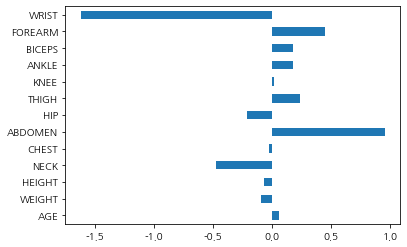

In [6]:
df_ridge_coef = pd.DataFrame({"Coef":result.coef_}, index = df_raw_x.columns)
df_ridge_coef.plot.barh(y="Coef", legend = False)

In [7]:
train_score = []
para_alpha = [n_alpha *0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    lasso = Lasso(random_state = 1234, alpha = v_alpha)
    lasso.fit(df_raw_x, df_raw_y)
    train_score.append(lasso.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.747998
1,0.2,0.745241
2,0.3,0.741448
3,0.4,0.736137
4,0.5,0.730741
5,0.6,0.727639
6,0.7,0.724263
7,0.8,0.722143
8,0.9,0.721207
9,1.0,0.720397


In [8]:
lasso_final = Lasso(alpha = 0.1, random_state = 1234)
result = lasso_final.fit(df_raw_x, df_raw_y)

df_lasso = pd.DataFrame()
df_lasso["variable"] = df_raw_x.columns
df_lasso["Coef"] = pd.DataFrame(result.coef_)
df_lasso

,variable,Coef
0,AGE,0.051814
1,WEIGHT,-0.098224
2,HEIGHT,-0.066683
3,NECK,-0.437469
4,CHEST,-0.001287
5,ABDOMEN,0.940655
6,HIP,-0.164923
7,THIGH,0.221392
8,KNEE,0.000000
9,ANKLE,0.076146


In [9]:
print(result.intercept_)

-22.98260618181477


<AxesSubplot:>

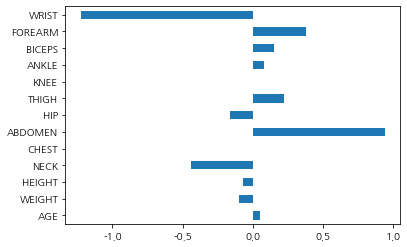

In [10]:
df_lasso_coef = pd.DataFrame({"Coef":result.coef_}, index = df_raw_x.columns)
df_lasso_coef.plot.barh(y="Coef", legend = False)

In [11]:
train_score = []
para_alpha = [n_alpha *0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    elastic = ElasticNet(random_state = 1234, alpha = v_alpha)
    elastic.fit(df_raw_x, df_raw_y)
    train_score.append(elastic.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.748188
1,0.2,0.746369
2,0.3,0.744264
3,0.4,0.742184
4,0.5,0.739976
5,0.6,0.737685
6,0.7,0.735334
7,0.8,0.732940
8,0.9,0.730512
9,1.0,0.728347


In [12]:
elastic_final = ElasticNet(alpha = 0.1, random_state = 1234)
result = elastic_final.fit(df_raw_x, df_raw_y)

df_elastic = pd.DataFrame()
df_elastic["variable"] = df_raw_x.columns
df_elastic["Coef"] = pd.DataFrame(result.coef_)
df_elastic

,variable,Coef
0,AGE,0.052387
1,WEIGHT,-0.097031
2,HEIGHT,-0.072548
3,NECK,-0.464105
4,CHEST,-0.008892
5,ABDOMEN,0.947577
6,HIP,-0.180995
7,THIGH,0.230140
8,KNEE,0.000000
9,ANKLE,0.099379


In [13]:
print(result.intercept_)

-22.28187272849863


<AxesSubplot:>

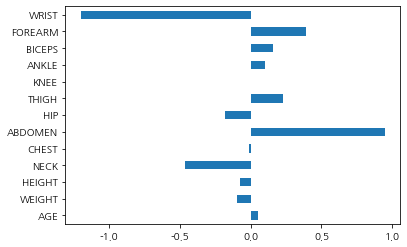

In [14]:
df_elastic_coef = pd.DataFrame({"Coef":result.coef_}, index = df_raw_x.columns)
df_elastic_coef.plot.barh(y="Coef", legend = False)

## 실습 151p

In [15]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/DIABETES.csv', encoding='euc-kr')

df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis=1, inplace=False)

In [16]:
train_score = []
para_alpha = [n_alpha *0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    ridge = Ridge(random_state = 1234, alpha = v_alpha)
    ridge.fit(df_raw_x, df_raw_y)
    train_score.append(ridge.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.517747
1,0.2,0.517742
2,0.3,0.517735
3,0.4,0.517725
4,0.5,0.517713
5,0.6,0.517698
6,0.7,0.517681
7,0.8,0.517662
8,0.9,0.517641
9,1.0,0.517618


In [17]:
ridge_final = Ridge(alpha = 0.1, random_state = 1234)
result = ridge_final.fit(df_raw_x, df_raw_y)

df_ridge = pd.DataFrame()
df_ridge["variable"] = df_raw_x.columns
df_ridge["Coef"] = pd.DataFrame(result.coef_)
df_ridge

,variable,Coef
0,AGE,-0.035978
1,GENDER,-22.834211
2,BMI,5.606966
3,BP,1.117056
4,CHOLESTEROL,-1.071163
5,LDL,0.729092
6,HDL,0.351145
7,TCH,6.503749
8,LTG,67.912885
9,GLUCOSE,0.280944


In [18]:
print(result.intercept_)

-332.5782250281321


<AxesSubplot:>

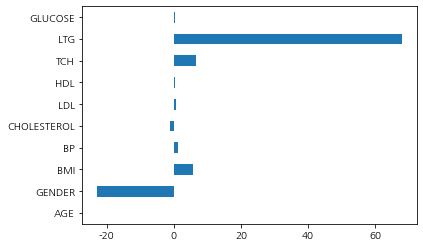

In [19]:
df_ridge_coef = pd.DataFrame({"Coef":result.coef_}, index = df_raw_x.columns)
df_ridge_coef.plot.barh(y="Coef", legend = False)

In [20]:
train_score = []
para_alpha = [n_alpha *0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    lasso = Lasso(random_state = 1234, alpha = v_alpha)
    lasso.fit(df_raw_x, df_raw_y)
    train_score.append(lasso.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.517648
1,0.2,0.517375
2,0.3,0.516961
3,0.4,0.516348
4,0.5,0.515561
5,0.6,0.514598
6,0.7,0.513855
7,0.8,0.512663
8,0.9,0.512027
9,1.0,0.510684


In [21]:
lasso_final = Lasso(alpha = 0.1, random_state = 1234)
result = lasso_final.fit(df_raw_x, df_raw_y)

df_lasso = pd.DataFrame()
df_lasso["variable"] = df_raw_x.columns
df_lasso["Coef"] = pd.DataFrame(result.coef_)
df_lasso

,variable,Coef
0,AGE,-0.034222
1,GENDER,-22.318852
2,BMI,5.628241
3,BP,1.113876
4,CHOLESTEROL,-0.934757
5,LDL,0.613370
6,HDL,0.176172
7,TCH,5.754523
8,LTG,64.326888
9,GLUCOSE,0.285376


In [22]:
print(result.intercept_)

-318.1204240146068


<AxesSubplot:>

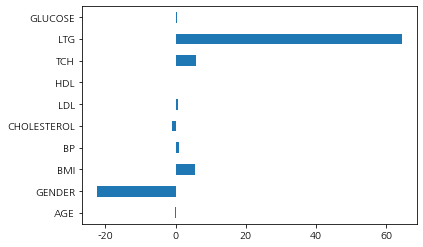

In [23]:
df_lasso_coef = pd.DataFrame({"Coef":result.coef_}, index = df_raw_x.columns)
df_lasso_coef.plot.barh(y="Coef", legend = False)

In [24]:
train_score = []
para_alpha = [n_alpha *0.1 for n_alpha in range(1, 11)]

for v_alpha in para_alpha:
    elastic = ElasticNet(random_state = 1234, alpha = v_alpha)
    elastic.fit(df_raw_x, df_raw_y)
    train_score.append(elastic.score(df_raw_x, df_raw_y))
    
df_score_alpha = pd.DataFrame()
df_score_alpha["Alpha"] = para_alpha
df_score_alpha["TrainScore"] = train_score
df_score_alpha

,Alpha,TrainScore
0,0.1,0.507664
1,0.2,0.501887
2,0.3,0.498299
3,0.4,0.495725
4,0.5,0.493741
5,0.6,0.492147
6,0.7,0.490828
7,0.8,0.489714
8,0.9,0.488758
9,1.0,0.487926


In [25]:
elastic_final = ElasticNet(alpha = 0.1, random_state = 1234)
result = elastic_final.fit(df_raw_x, df_raw_y)

df_elastic = pd.DataFrame()
df_elastic["variable"] = df_raw_x.columns
df_elastic["Coef"] = pd.DataFrame(result.coef_)
df_elastic

,variable,Coef
0,AGE,-0.016041
1,GENDER,-18.035466
2,BMI,5.949904
3,BP,1.115480
4,CHOLESTEROL,0.424041
5,LDL,-0.637493
6,HDL,-1.299269
7,TCH,3.428739
8,LTG,23.457901
9,GLUCOSE,0.338639


In [26]:
print(result.intercept_)

-178.77746094448625


<AxesSubplot:>

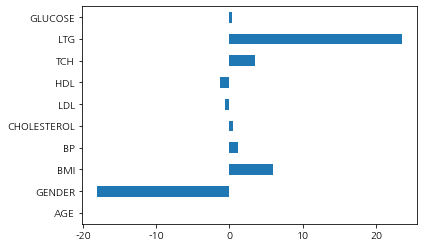

In [27]:
df_elastic_coef = pd.DataFrame({"Coef":result.coef_}, index = df_raw_x.columns)
df_elastic_coef.plot.barh(y="Coef", legend = False)

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [29]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/체질검사.csv', encoding='euc-kr')

df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis=1, inplace=False)

In [30]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


In [31]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.345


In [32]:
train_score = []
test_score = []

para_leaf = [n_leaf * 1 for n_leaf in range(1, 20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score

In [33]:
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,1.000,0.345
1,2,0.970,0.374
2,3,0.928,0.445
3,4,0.902,0.447
4,5,0.868,0.451
5,6,0.851,0.447
6,7,0.843,0.465
7,8,0.830,0.536
8,9,0.802,0.477
9,10,0.793,0.505


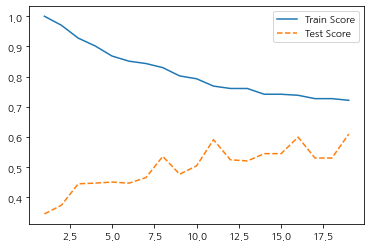

In [34]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.legend()

[Text(526.1842105263157, 849.375, 'ABDOMEN <= 91.3\nmse = 70.379\nsamples = 176\nvalue = 18.676'),
 Text(318.1578947368421, 736.125, 'ABDOMEN <= 85.45\nmse = 31.841\nsamples = 90\nvalue = 12.782'),
 Text(195.78947368421052, 622.875, 'AGE <= 42.5\nmse = 21.668\nsamples = 50\nvalue = 10.014'),
 Text(97.89473684210526, 509.625, 'THIGH <= 52.15\nmse = 18.586\nsamples = 32\nvalue = 8.584'),
 Text(48.94736842105263, 396.375, 'mse = 10.761\nsamples = 8\nvalue = 4.887'),
 Text(146.8421052631579, 396.375, 'WRIST <= 17.65\nmse = 15.12\nsamples = 24\nvalue = 9.817'),
 Text(97.89473684210526, 283.125, 'mse = 5.16\nsamples = 10\nvalue = 13.28'),
 Text(195.78947368421052, 283.125, 'mse = 7.547\nsamples = 14\nvalue = 7.343'),
 Text(293.6842105263158, 509.625, 'BICEPS <= 29.65\nmse = 17.054\nsamples = 18\nvalue = 12.556'),
 Text(244.73684210526315, 396.375, 'mse = 11.793\nsamples = 9\nvalue = 14.767'),
 Text(342.63157894736844, 396.375, 'mse = 12.536\nsamples = 9\nvalue = 10.344'),
 Text(440.526315789

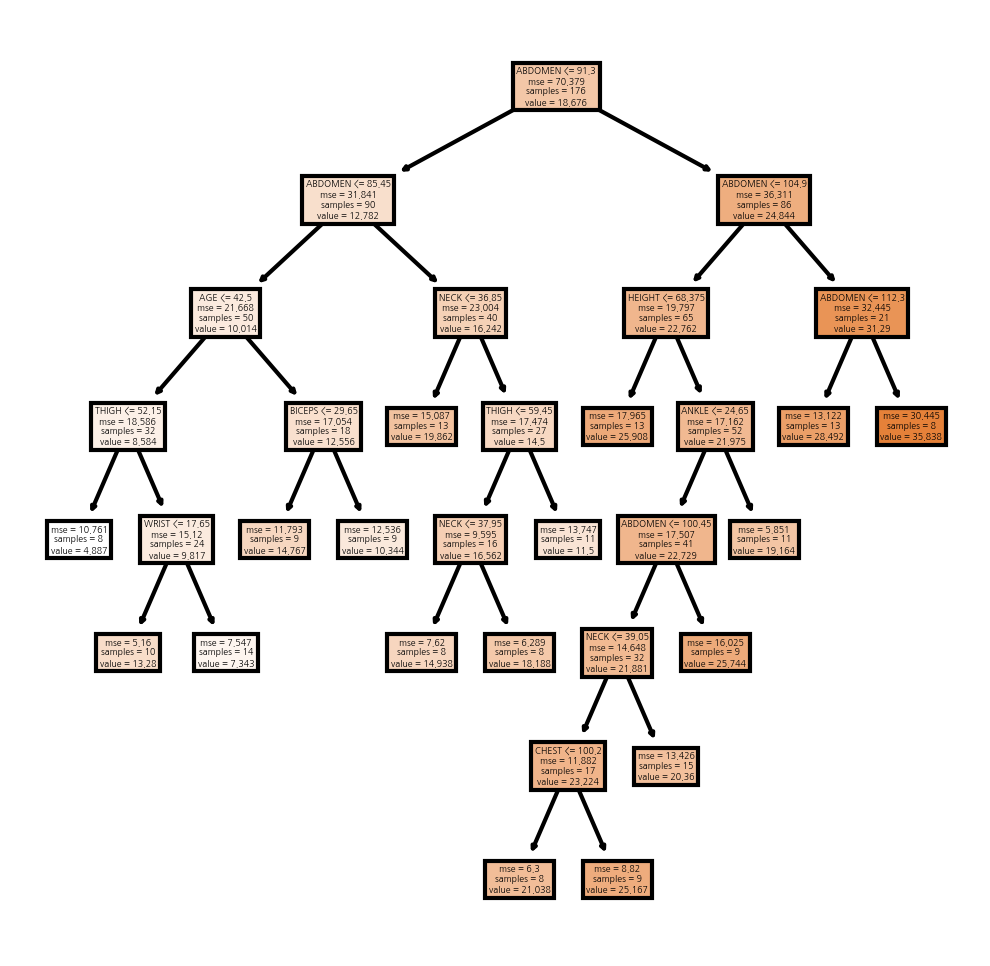

In [35]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plot_tree(tree_graph, feature_names=v_feature_name,filled=True)

In [36]:
train_score = []
test_score = []

para_split = [n_leaf * 2 for n_leaf in range(2, 20)]

for v_min_samples_leaf in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_split = pd.DataFrame()
df_score_split["MinSamplesLeaf"] = para_split
df_score_split["TrainScore"] = train_score
df_score_split["TestScore"] = test_score
df_score_split.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,4,0.902,0.447
1,6,0.851,0.447
2,8,0.830,0.536
3,10,0.793,0.505
4,12,0.761,0.525
5,14,0.742,0.545
6,16,0.738,0.600
7,18,0.727,0.530
8,20,0.715,0.589
9,22,0.701,0.558


In [37]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.345


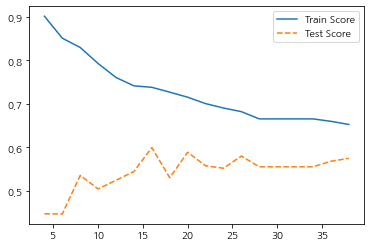

In [38]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.legend()

[Text(564.6428571428571, 830.5, 'ABDOMEN <= 91.3\nmse = 70.379\nsamples = 176\nvalue = 18.676'),
 Text(332.14285714285717, 679.5, 'ABDOMEN <= 85.45\nmse = 31.841\nsamples = 90\nvalue = 12.782'),
 Text(199.28571428571428, 528.5, 'AGE <= 42.5\nmse = 21.668\nsamples = 50\nvalue = 10.014'),
 Text(132.85714285714286, 377.5, 'ABDOMEN <= 79.85\nmse = 18.586\nsamples = 32\nvalue = 8.584'),
 Text(66.42857142857143, 226.5, 'mse = 14.54\nsamples = 16\nvalue = 6.9'),
 Text(199.28571428571428, 226.5, 'mse = 16.957\nsamples = 16\nvalue = 10.269'),
 Text(265.7142857142857, 377.5, 'mse = 17.054\nsamples = 18\nvalue = 12.556'),
 Text(465.0, 528.5, 'WEIGHT <= 174.125\nmse = 23.004\nsamples = 40\nvalue = 16.242'),
 Text(398.57142857142856, 377.5, 'mse = 15.556\nsamples = 24\nvalue = 18.1'),
 Text(531.4285714285714, 377.5, 'mse = 21.239\nsamples = 16\nvalue = 13.456'),
 Text(797.1428571428571, 679.5, 'ABDOMEN <= 104.9\nmse = 36.311\nsamples = 86\nvalue = 24.844'),
 Text(730.7142857142858, 528.5, 'HEIGHT <

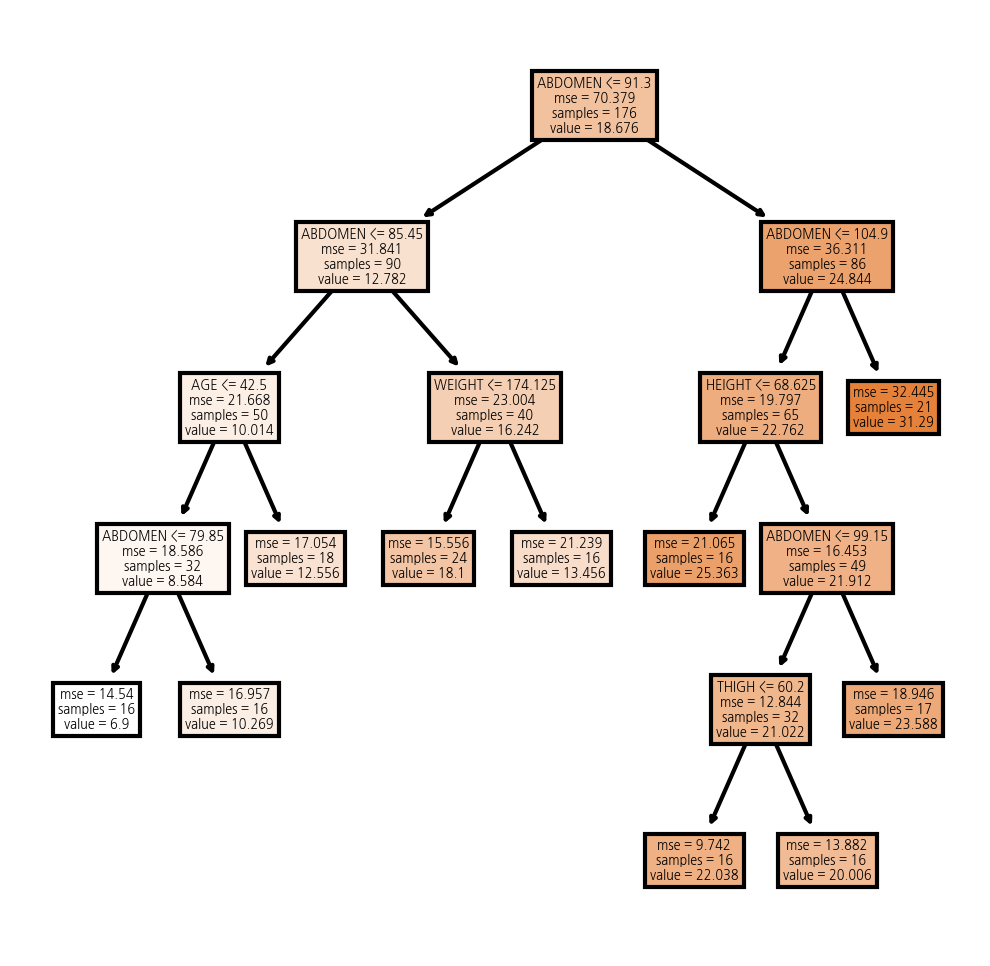

In [40]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=16)
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plot_tree(tree_graph, feature_names=v_feature_name,filled=True)

In [41]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=8, min_samples_split=20, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


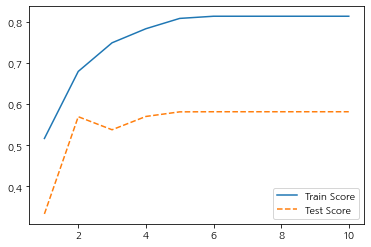

In [42]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

[Text(492.35294117647055, 815.4, 'ABDOMEN <= 91.3\nmse = 70.379\nsamples = 176\nvalue = 18.676'),
 Text(273.52941176470586, 634.2, 'ABDOMEN <= 85.45\nmse = 31.841\nsamples = 90\nvalue = 12.782'),
 Text(164.11764705882354, 453.0, 'AGE <= 42.5\nmse = 21.668\nsamples = 50\nvalue = 10.014'),
 Text(109.41176470588235, 271.80000000000007, 'THIGH <= 52.15\nmse = 18.586\nsamples = 32\nvalue = 8.584'),
 Text(54.705882352941174, 90.60000000000002, 'mse = 10.761\nsamples = 8\nvalue = 4.887'),
 Text(164.11764705882354, 90.60000000000002, 'mse = 15.12\nsamples = 24\nvalue = 9.817'),
 Text(218.8235294117647, 271.80000000000007, 'mse = 17.054\nsamples = 18\nvalue = 12.556'),
 Text(382.94117647058823, 453.0, 'NECK <= 36.85\nmse = 23.004\nsamples = 40\nvalue = 16.242'),
 Text(328.2352941176471, 271.80000000000007, 'mse = 15.087\nsamples = 13\nvalue = 19.862'),
 Text(437.6470588235294, 271.80000000000007, 'THIGH <= 59.45\nmse = 17.474\nsamples = 27\nvalue = 14.5'),
 Text(382.94117647058823, 90.600000000

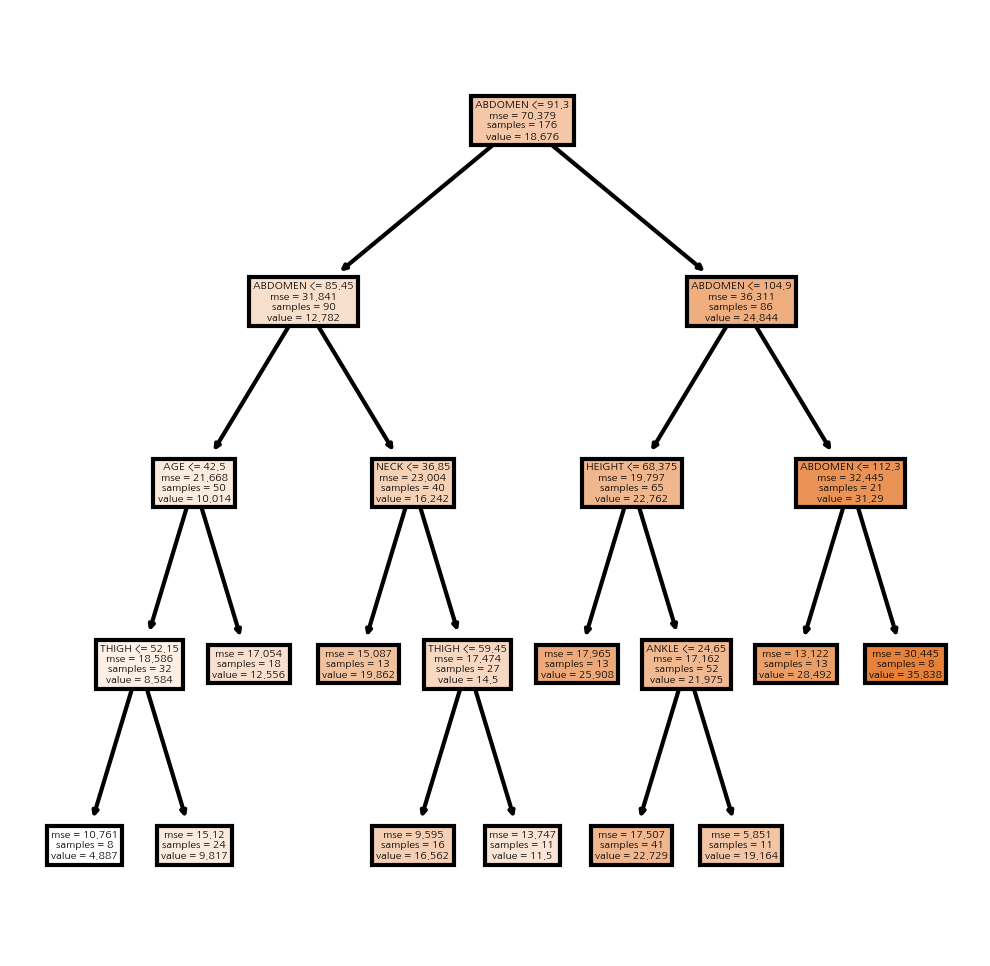

In [43]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plot_tree(tree_graph, feature_names=v_feature_name,filled=True)

In [44]:
tree_final = DecisionTreeRegressor(min_samples_leaf=8, min_samples_split=20, max_depth=4, random_state=1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=8, min_samples_split=20,
                      random_state=1234)

[Text(492.35294117647055, 815.4, 'ABDOMEN <= 91.3\nmse = 70.379\nsamples = 176\nvalue = 18.676'),
 Text(273.52941176470586, 634.2, 'ABDOMEN <= 85.45\nmse = 31.841\nsamples = 90\nvalue = 12.782'),
 Text(164.11764705882354, 453.0, 'AGE <= 42.5\nmse = 21.668\nsamples = 50\nvalue = 10.014'),
 Text(109.41176470588235, 271.80000000000007, 'THIGH <= 52.15\nmse = 18.586\nsamples = 32\nvalue = 8.584'),
 Text(54.705882352941174, 90.60000000000002, 'mse = 10.761\nsamples = 8\nvalue = 4.887'),
 Text(164.11764705882354, 90.60000000000002, 'mse = 15.12\nsamples = 24\nvalue = 9.817'),
 Text(218.8235294117647, 271.80000000000007, 'mse = 17.054\nsamples = 18\nvalue = 12.556'),
 Text(382.94117647058823, 453.0, 'NECK <= 36.85\nmse = 23.004\nsamples = 40\nvalue = 16.242'),
 Text(328.2352941176471, 271.80000000000007, 'mse = 15.087\nsamples = 13\nvalue = 19.862'),
 Text(437.6470588235294, 271.80000000000007, 'THIGH <= 59.45\nmse = 17.474\nsamples = 27\nvalue = 14.5'),
 Text(382.94117647058823, 90.600000000

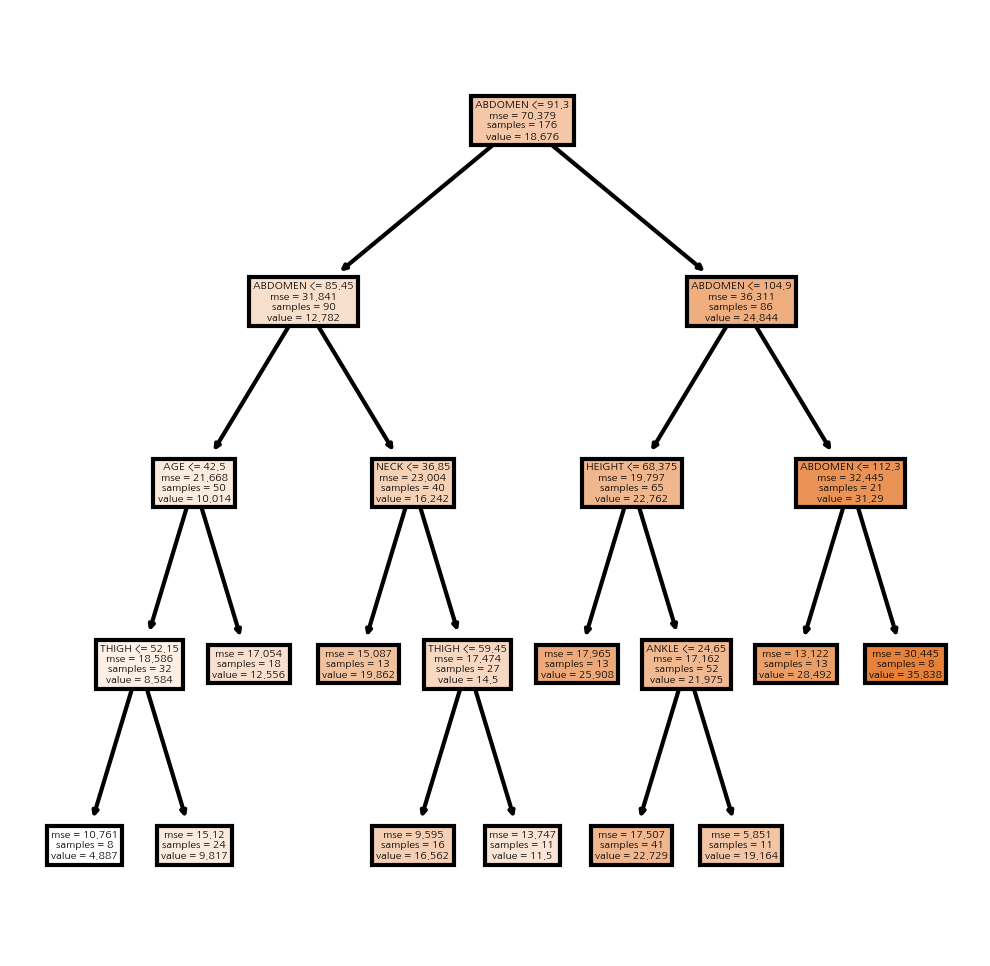

In [45]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8, min_samples_split=20, max_depth=4)
tree_graph.fit(df_train_x, df_train_y)
v_feature_name = df_train_x.columns
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi=300)
plot_tree(tree_graph, feature_names=v_feature_name, filled=True)

In [46]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = tree_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


In [47]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : 0.345


Text(0, 0.5, '변수')

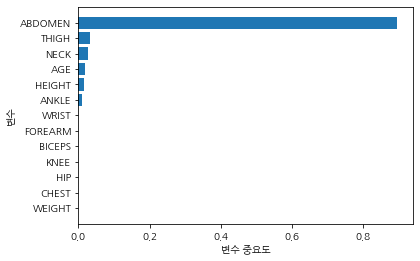

In [48]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

## 실습 189p

In [49]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/DIABETES.csv', encoding='euc-kr')

df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis=1, inplace=False)
df_raw

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.00,157,93.2,38.0,4.00,4.8598,87
1,75,48,1,21.6,87.00,183,103.2,70.0,3.00,3.8918,69
2,141,72,2,30.5,93.00,156,93.6,41.0,4.00,4.6728,85
3,206,24,1,25.3,84.00,198,131.4,40.0,5.00,4.8903,89
4,135,50,1,23.0,101.00,192,125.4,52.0,4.00,4.2905,80
...,...,...,...,...,...,...,...,...,...,...,...
437,178,60,2,28.2,112.00,185,113.8,42.0,4.00,4.9836,93
438,104,47,2,24.9,75.00,225,166.0,42.0,5.00,4.4427,102
439,132,60,2,24.9,99.67,162,106.6,43.0,3.77,4.1271,95
440,220,36,1,30.0,95.00,201,125.2,42.0,4.79,5.1299,85


In [50]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_y.shape))

train data X size : (309, 10)
train data Y size : (309,)
test data X size : (133, 10)
test data Y size : (133,)


In [51]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 6)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf=14, min_samples_split=16, max_depth=v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))
    
df_score_depth = pd.DataFrame()
df_score_depth["Depth"] = para_depth
df_score_depth["TrainScore"] = train_score
df_score_depth["TestScore"] = test_score
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.292,0.231
1,2,0.438,0.351
2,3,0.511,0.279
3,4,0.549,0.275
4,5,0.572,0.235


In [52]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 1.000
Score on test set : -0.143


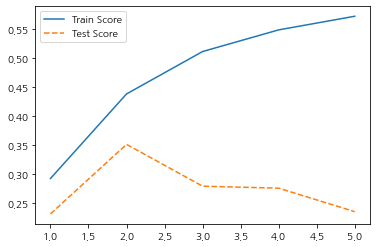

In [53]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.legend()

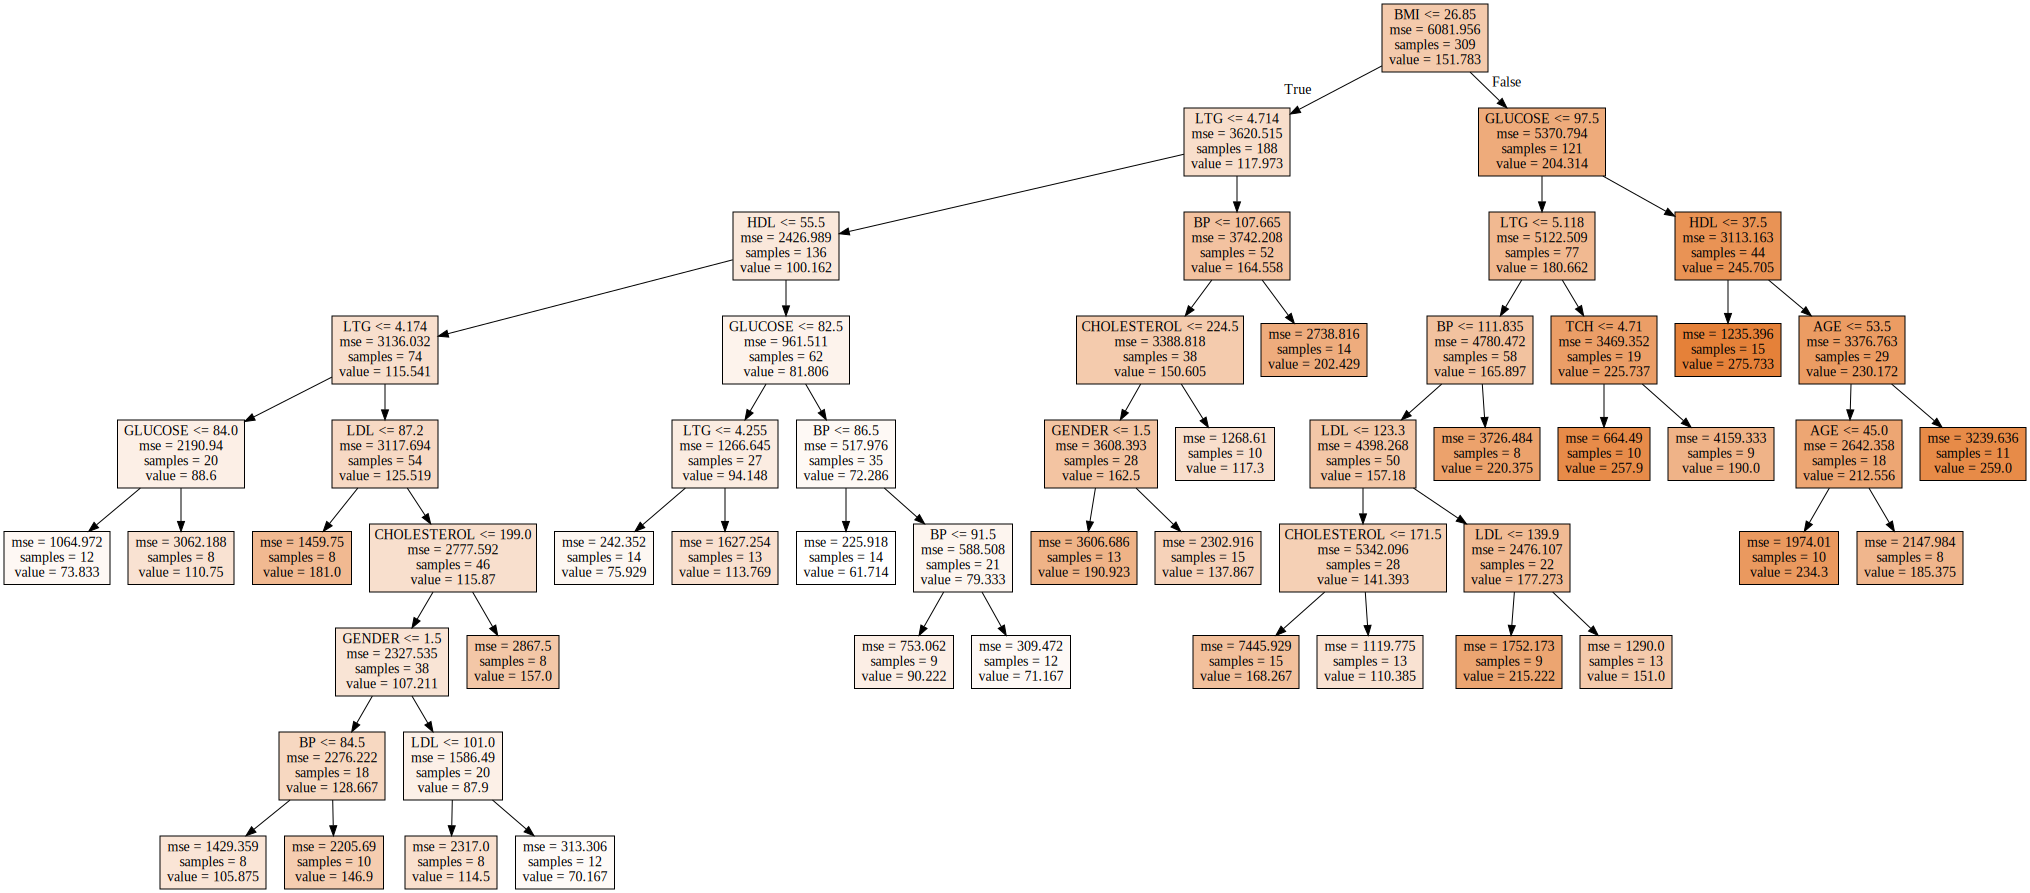

In [54]:
v_feature_name = df_train_x.columns
tree_graph = DecisionTreeRegressor(random_state=1234, min_samples_leaf=8)
tree_graph.fit(df_train_x, df_train_y)
export_graphviz(tree_graph, out_file="tree_leaf.dot", feature_names=v_feature_name, impurity=True, filled=True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [165]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.919
Score on test set : 0.455


In [166]:
rf_uncustomized

RandomForestRegressor(random_state=1234)

In [170]:
train_score = []
test_score = []

para_n_tree = [n_tree for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,1,0.589,-0.363
1,2,0.738,-0.055
2,3,0.792,0.101
3,4,0.803,0.195
4,5,0.839,0.281
5,6,0.857,0.335
6,7,0.872,0.363
7,8,0.882,0.367
8,9,0.888,0.370
9,10,0.892,0.393


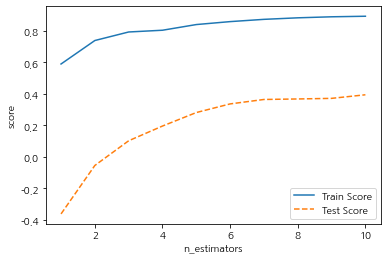

In [171]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [181]:
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators=100, random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.919,0.455
1,2,0.883,0.461
2,3,0.832,0.471
3,4,0.786,0.470
4,5,0.752,0.468
5,6,0.718,0.470
6,7,0.694,0.475
7,8,0.671,0.474
8,9,0.650,0.478
9,10,0.633,0.476


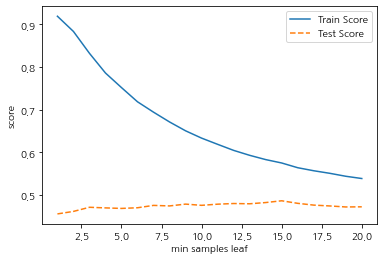

In [182]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [184]:
train_score = []
test_score = []

para_split = [n_split for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators=100, random_state = 1234, min_samples_leaf=6, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.718,0.470
1,3,0.718,0.470
2,4,0.718,0.470
3,5,0.718,0.470
4,6,0.718,0.470
5,7,0.718,0.470
6,8,0.718,0.470
7,9,0.718,0.470
8,10,0.718,0.470
9,11,0.718,0.470


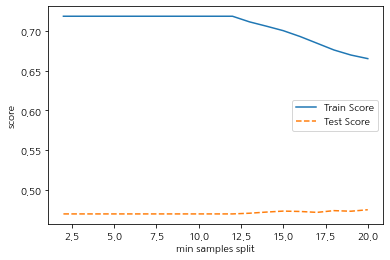

In [185]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [186]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators=100, random_state = 1234, min_samples_leaf=6, min_samples_split=14, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["Depth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,Depth,TrainScore,TestScore
0,1,0.387,0.406
1,2,0.491,0.474
2,3,0.568,0.492
3,4,0.630,0.487
4,5,0.674,0.480
5,6,0.696,0.473
6,7,0.704,0.472
7,8,0.706,0.472
8,9,0.706,0.472
9,10,0.706,0.472


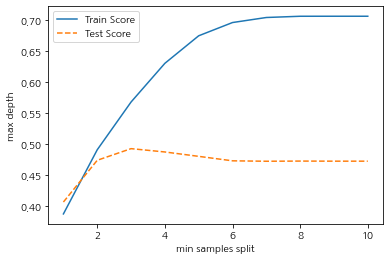

In [188]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("max depth")
plt.xlabel("min samples split")
plt.legend()

In [189]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=6, min_impurity_split=14, max_depth=4)

rf_final.fit(df_train_x, df_train_y)
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.634
Score on test set : 0.486


[Text(1395.0, 1630.8, 'BMI <= 26.85\nmse = 6815.251\nsamples = 199\nvalue = 153.314'),
 Text(824.3181818181818, 1268.4, 'TCH <= 5.815\nmse = 3329.935\nsamples = 117\nvalue = 111.979'),
 Text(507.27272727272725, 906.0, 'HDL <= 55.5\nmse = 2396.151\nsamples = 104\nvalue = 101.276'),
 Text(253.63636363636363, 543.6000000000001, 'LTG <= 4.033\nmse = 2722.132\nsamples = 59\nvalue = 115.681'),
 Text(126.81818181818181, 181.20000000000005, 'mse = 1681.562\nsamples = 9\nvalue = 73.75'),
 Text(380.45454545454544, 181.20000000000005, 'mse = 2500.946\nsamples = 50\nvalue = 124.282'),
 Text(760.9090909090909, 543.6000000000001, 'LTG <= 4.533\nmse = 1284.285\nsamples = 45\nvalue = 81.652'),
 Text(634.090909090909, 181.20000000000005, 'mse = 618.6\nsamples = 33\nvalue = 72.0'),
 Text(887.7272727272727, 181.20000000000005, 'mse = 2145.734\nsamples = 12\nvalue = 107.053'),
 Text(1141.3636363636363, 906.0, 'AGE <= 51.5\nmse = 3610.389\nsamples = 13\nvalue = 184.667'),
 Text(1014.5454545454545, 543.6000

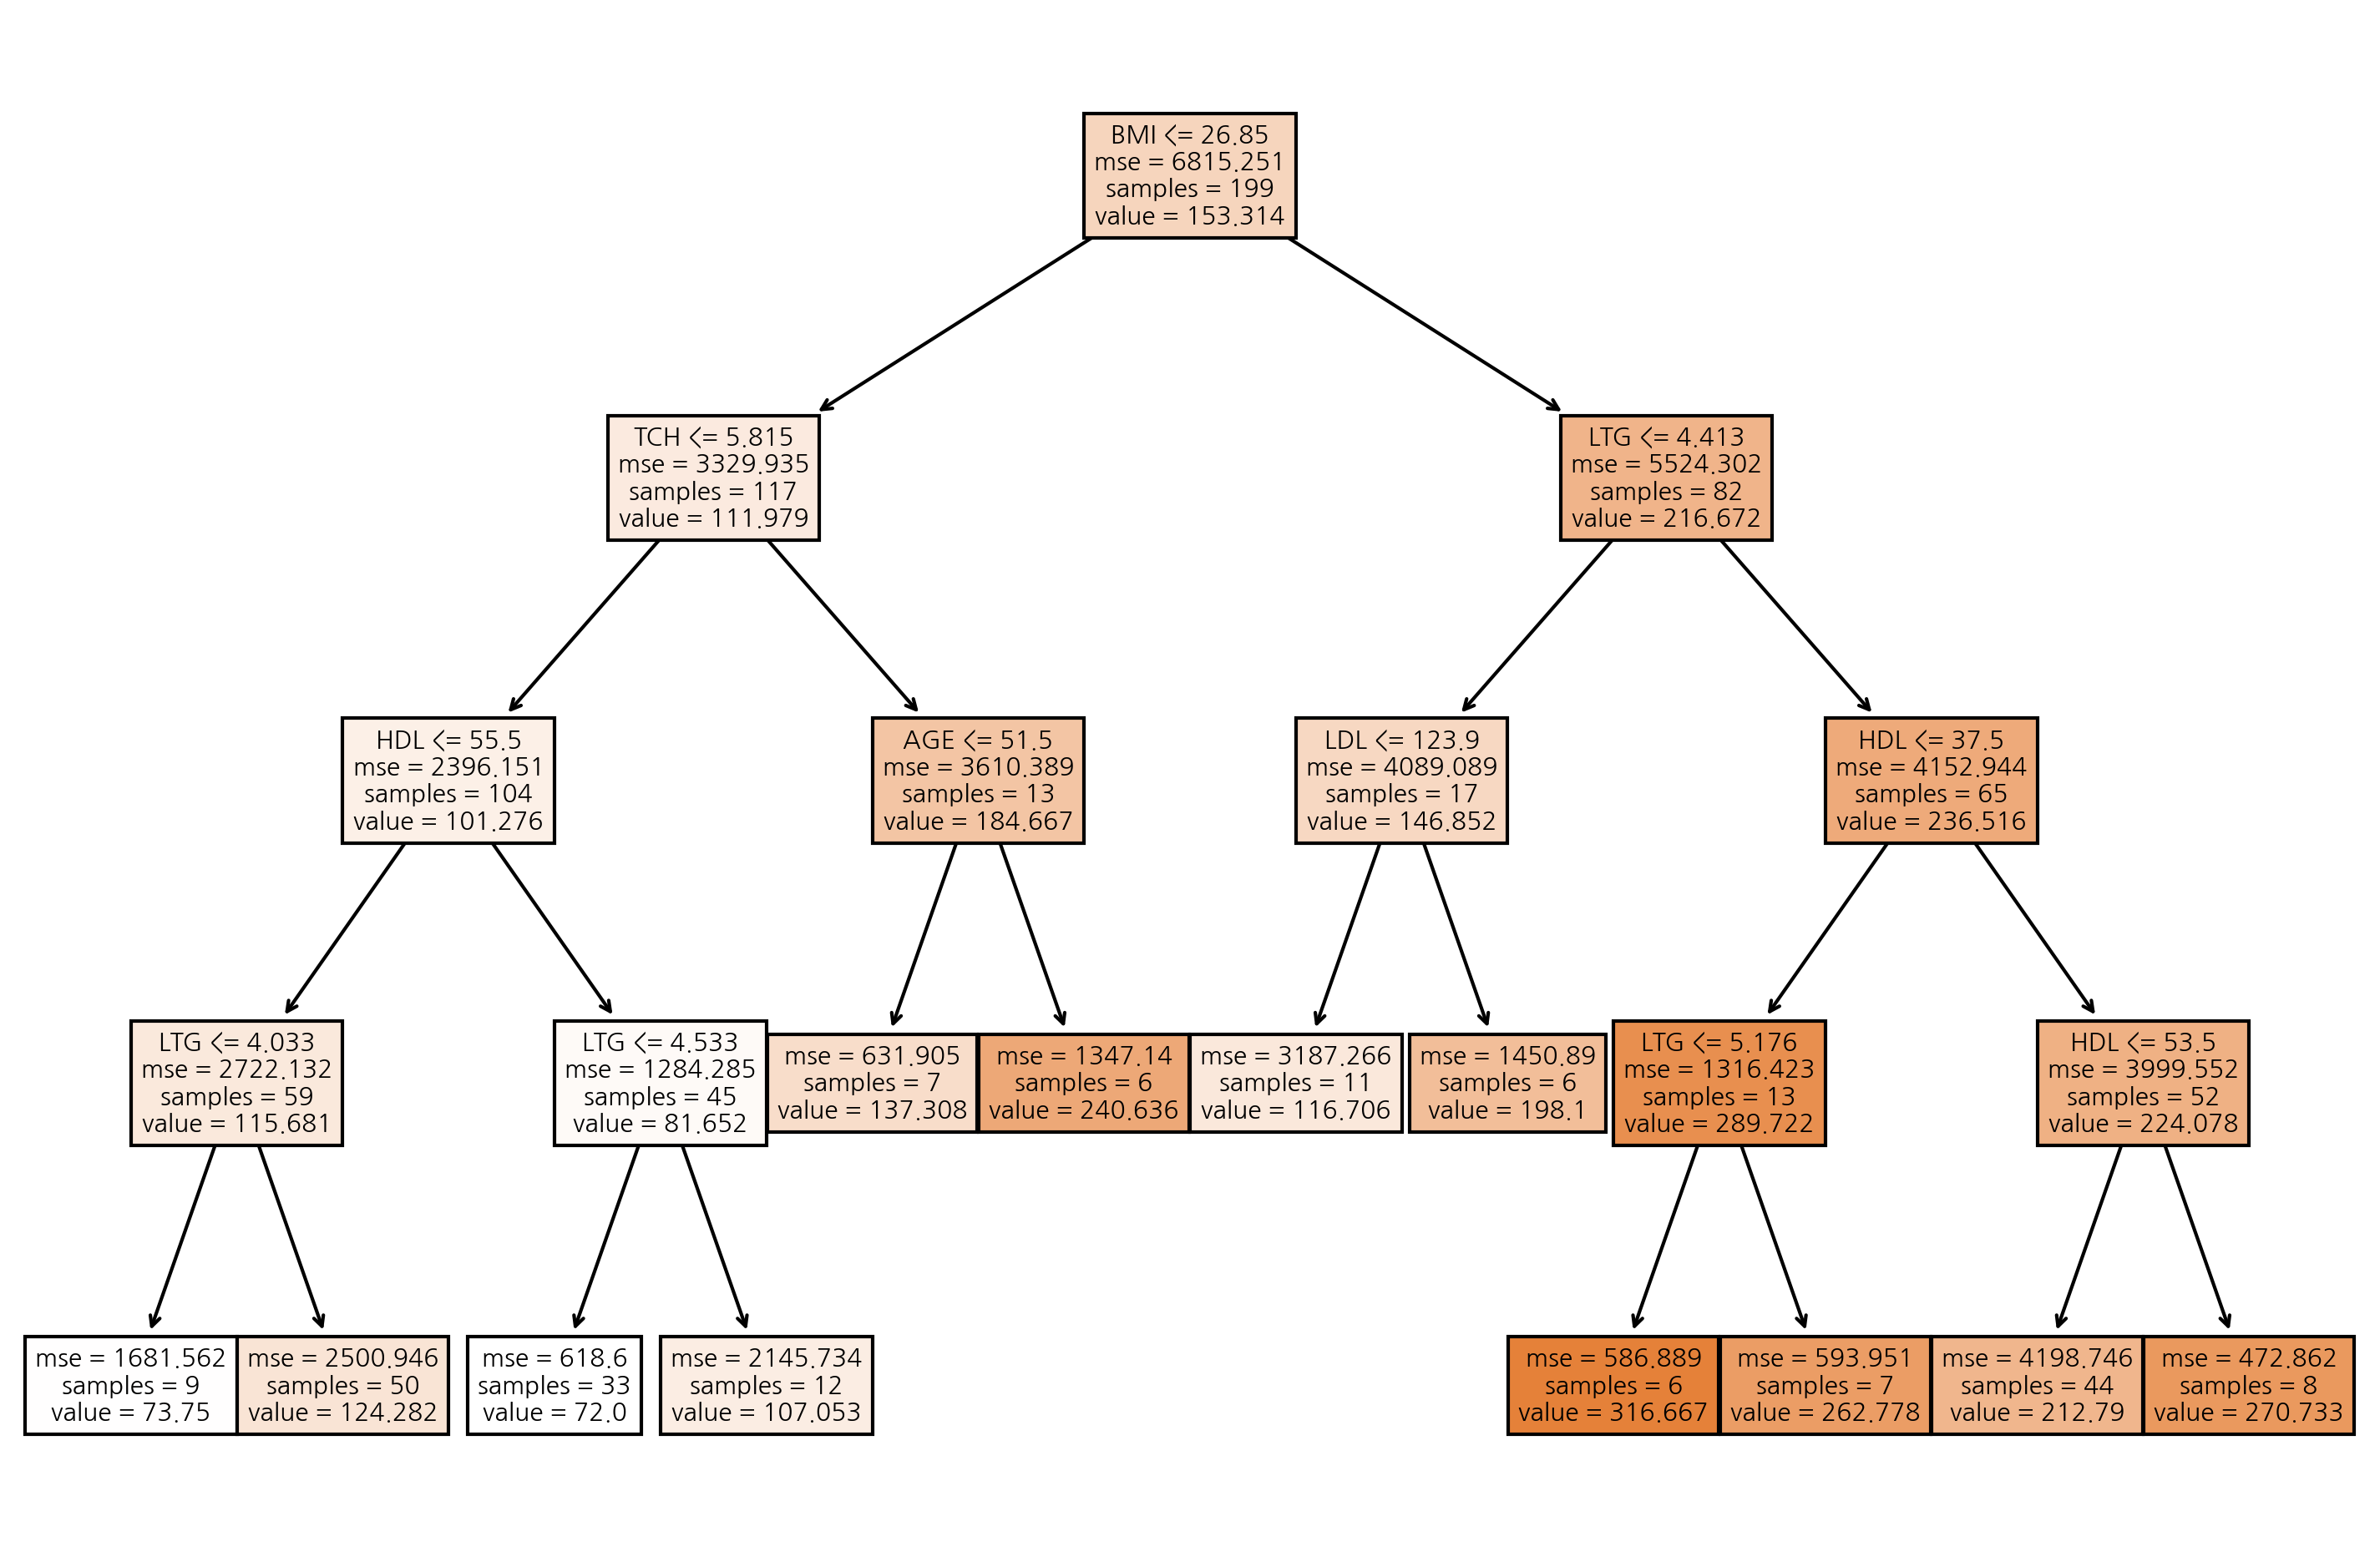

In [190]:
v_feature_name = df_train_x.columns
flg, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,8),dpi=300)
plot_tree(rf_final.estimators_[0], feature_names=v_feature_name, filled=True)

[Text(1576.9565217391305, 1630.8, 'LTG <= 4.824\nmse = 5958.392\nsamples = 198\nvalue = 148.699'),
 Text(909.7826086956521, 1268.4, 'BMI <= 26.85\nmse = 3560.162\nsamples = 132\nvalue = 117.361'),
 Text(485.2173913043478, 906.0, 'HDL <= 55.5\nmse = 2192.611\nsamples = 102\nvalue = 103.303'),
 Text(242.6086956521739, 543.6000000000001, 'LTG <= 4.27\nmse = 2519.638\nsamples = 60\nvalue = 119.717'),
 Text(121.30434782608695, 181.20000000000005, 'mse = 2419.751\nsamples = 18\nvalue = 93.308'),
 Text(363.9130434782609, 181.20000000000005, 'mse = 2175.985\nsamples = 42\nvalue = 130.121'),
 Text(727.8260869565217, 543.6000000000001, 'LTG <= 4.159\nmse = 1012.976\nsamples = 42\nvalue = 82.616'),
 Text(606.5217391304348, 181.20000000000005, 'mse = 339.726\nsamples = 18\nvalue = 67.97'),
 Text(849.1304347826086, 181.20000000000005, 'mse = 1245.41\nsamples = 24\nvalue = 94.7'),
 Text(1334.3478260869565, 906.0, 'GLUCOSE <= 97.5\nmse = 5023.378\nsamples = 30\nvalue = 175.35'),
 Text(1213.0434782608

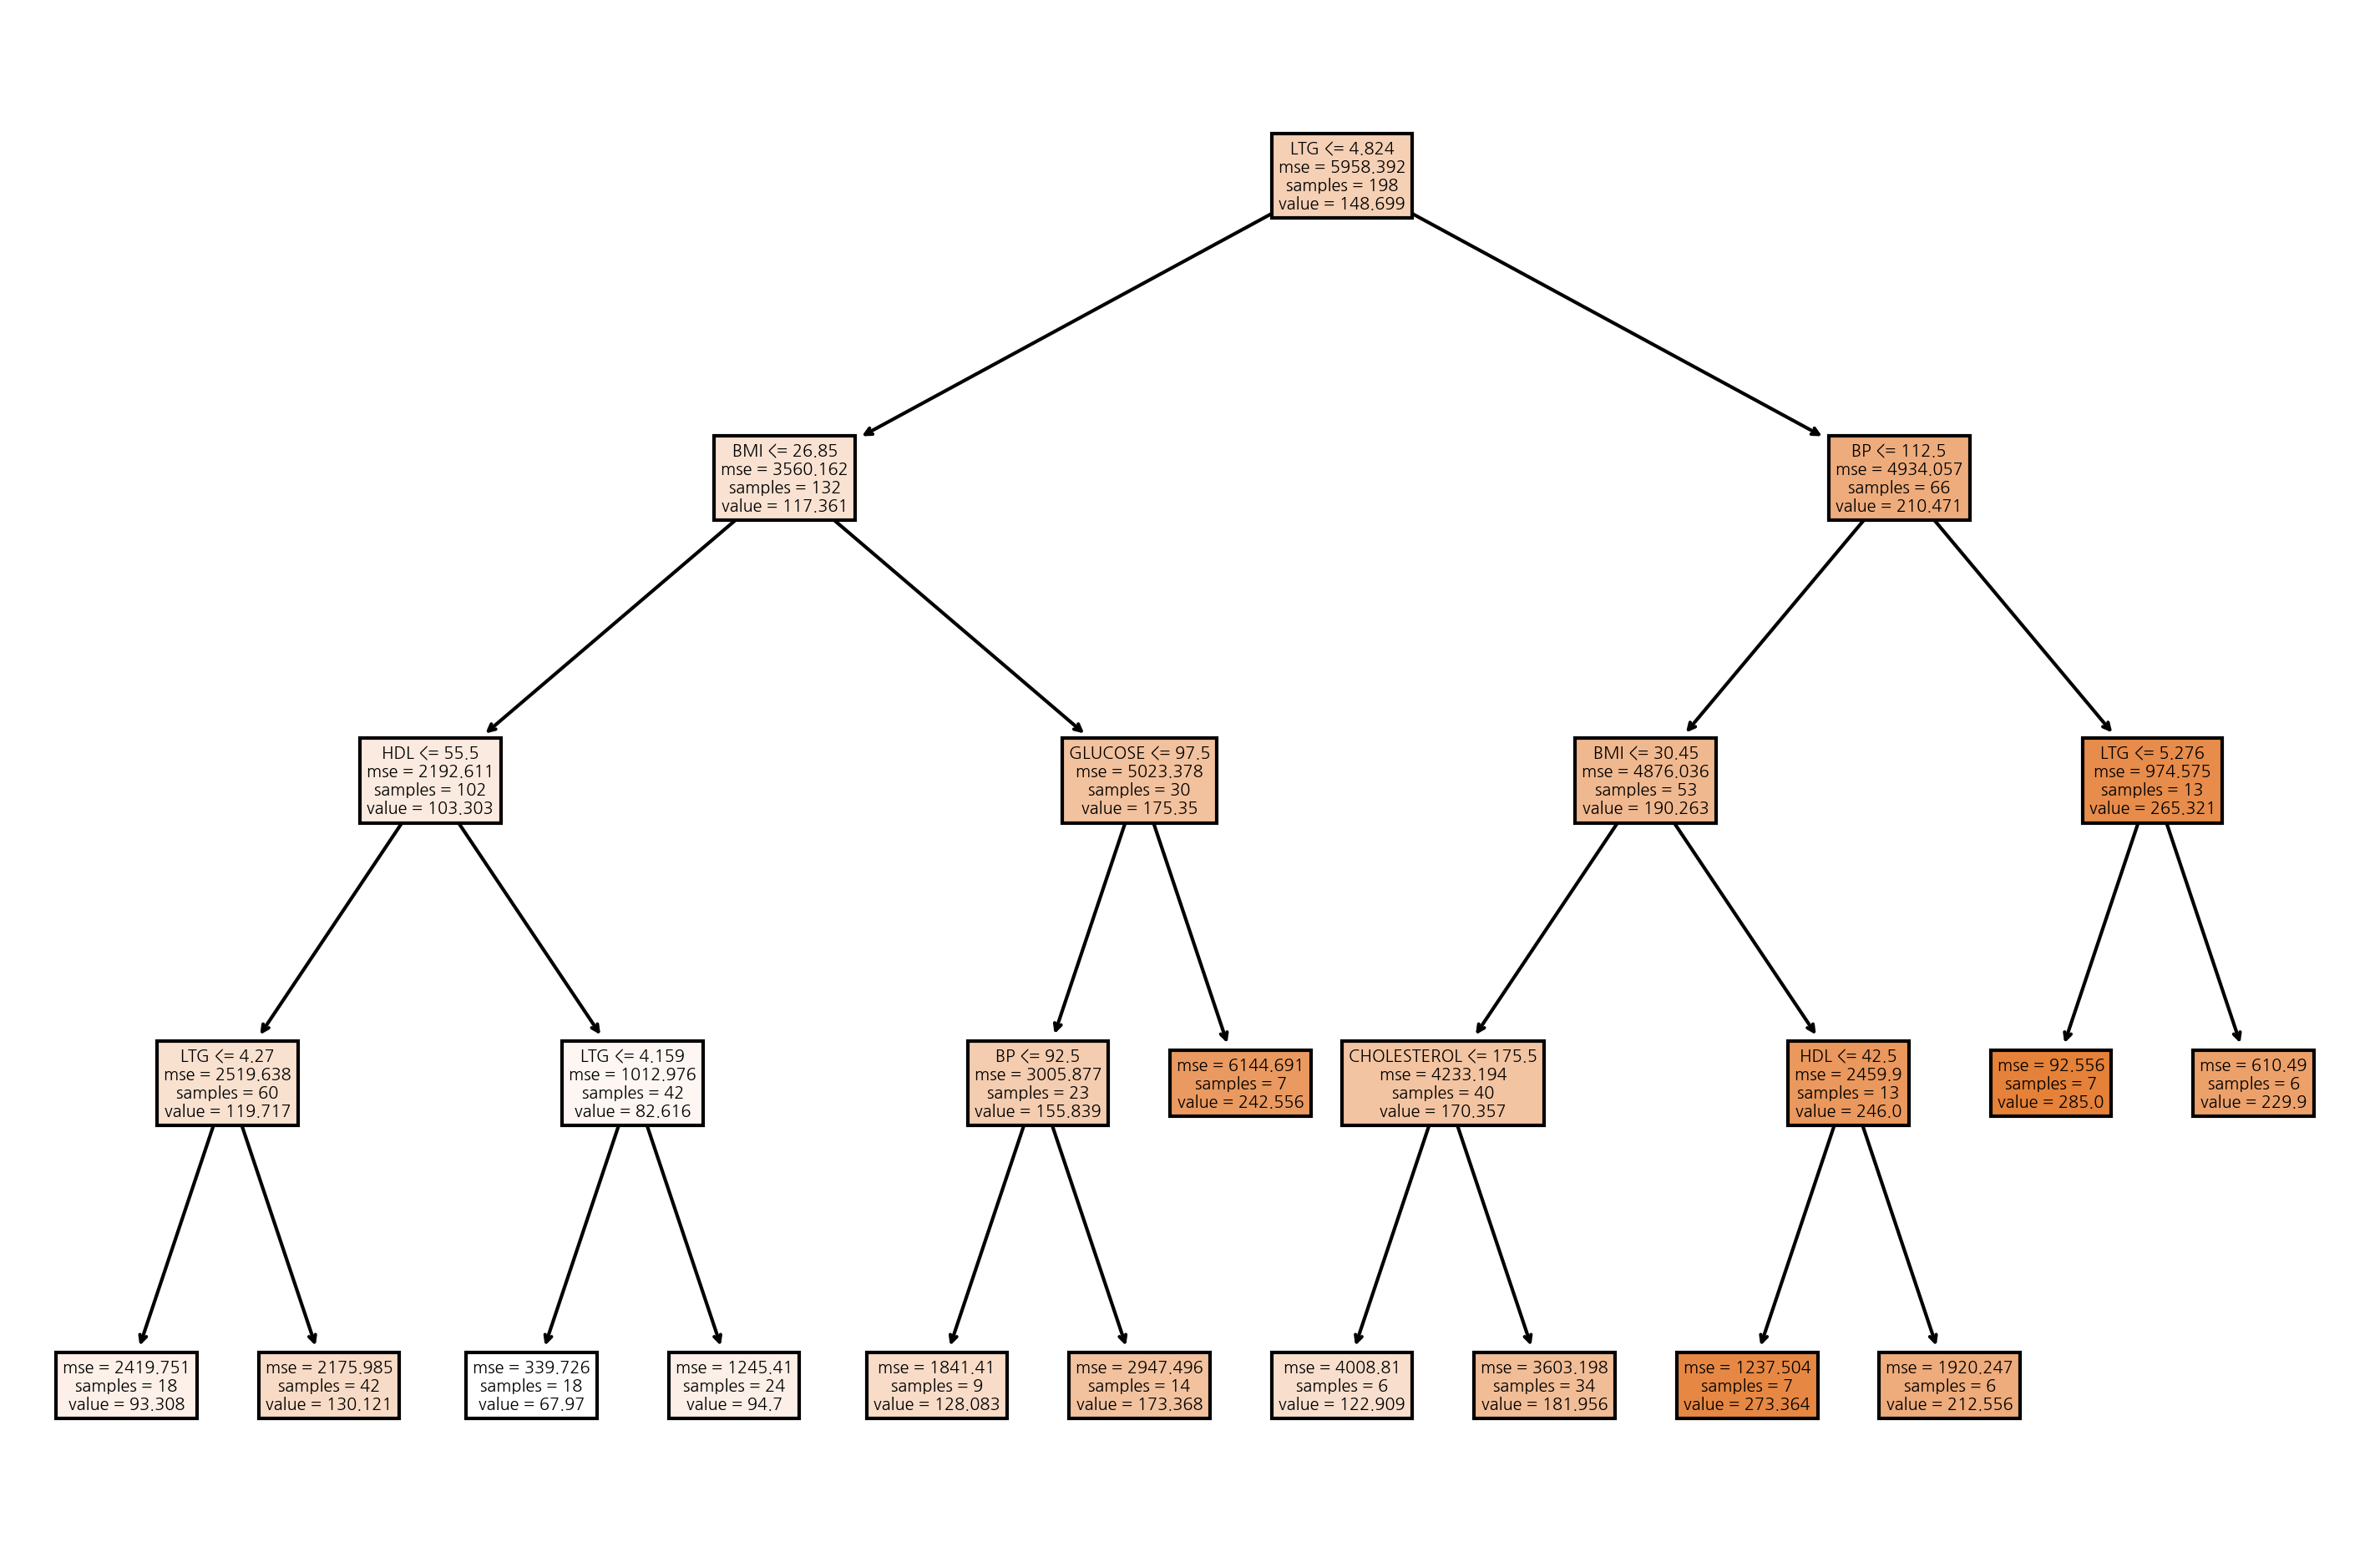

In [191]:
v_feature_name = df_train_x.columns
flg, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,8),dpi=300)
plot_tree(rf_final.estimators_[5], feature_names=v_feature_name, filled=True)

[Text(1553.5227272727273, 1630.8, 'BMI <= 26.85\nmse = 6180.043\nsamples = 201\nvalue = 154.388'),
 Text(951.1363636363636, 1268.4, 'LTG <= 4.71\nmse = 3281.279\nsamples = 126\nvalue = 116.233'),
 Text(507.27272727272725, 906.0, 'HDL <= 56.5\nmse = 1855.235\nsamples = 90\nvalue = 95.328'),
 Text(253.63636363636363, 543.6000000000001, 'HDL <= 50.5\nmse = 2241.673\nsamples = 51\nvalue = 104.848'),
 Text(126.81818181818181, 181.20000000000005, 'mse = 1692.205\nsamples = 31\nvalue = 91.712'),
 Text(380.45454545454544, 181.20000000000005, 'mse = 2327.46\nsamples = 20\nvalue = 130.148'),
 Text(760.9090909090909, 543.6000000000001, 'GENDER <= 1.5\nmse = 983.026\nsamples = 39\nvalue = 81.655'),
 Text(634.090909090909, 181.20000000000005, 'mse = 1044.757\nsamples = 30\nvalue = 88.22'),
 Text(887.7272727272727, 181.20000000000005, 'mse = 306.388\nsamples = 9\nvalue = 62.429'),
 Text(1395.0, 906.0, 'HDL <= 56.0\nmse = 3097.01\nsamples = 36\nvalue = 167.164'),
 Text(1268.181818181818, 543.60000000

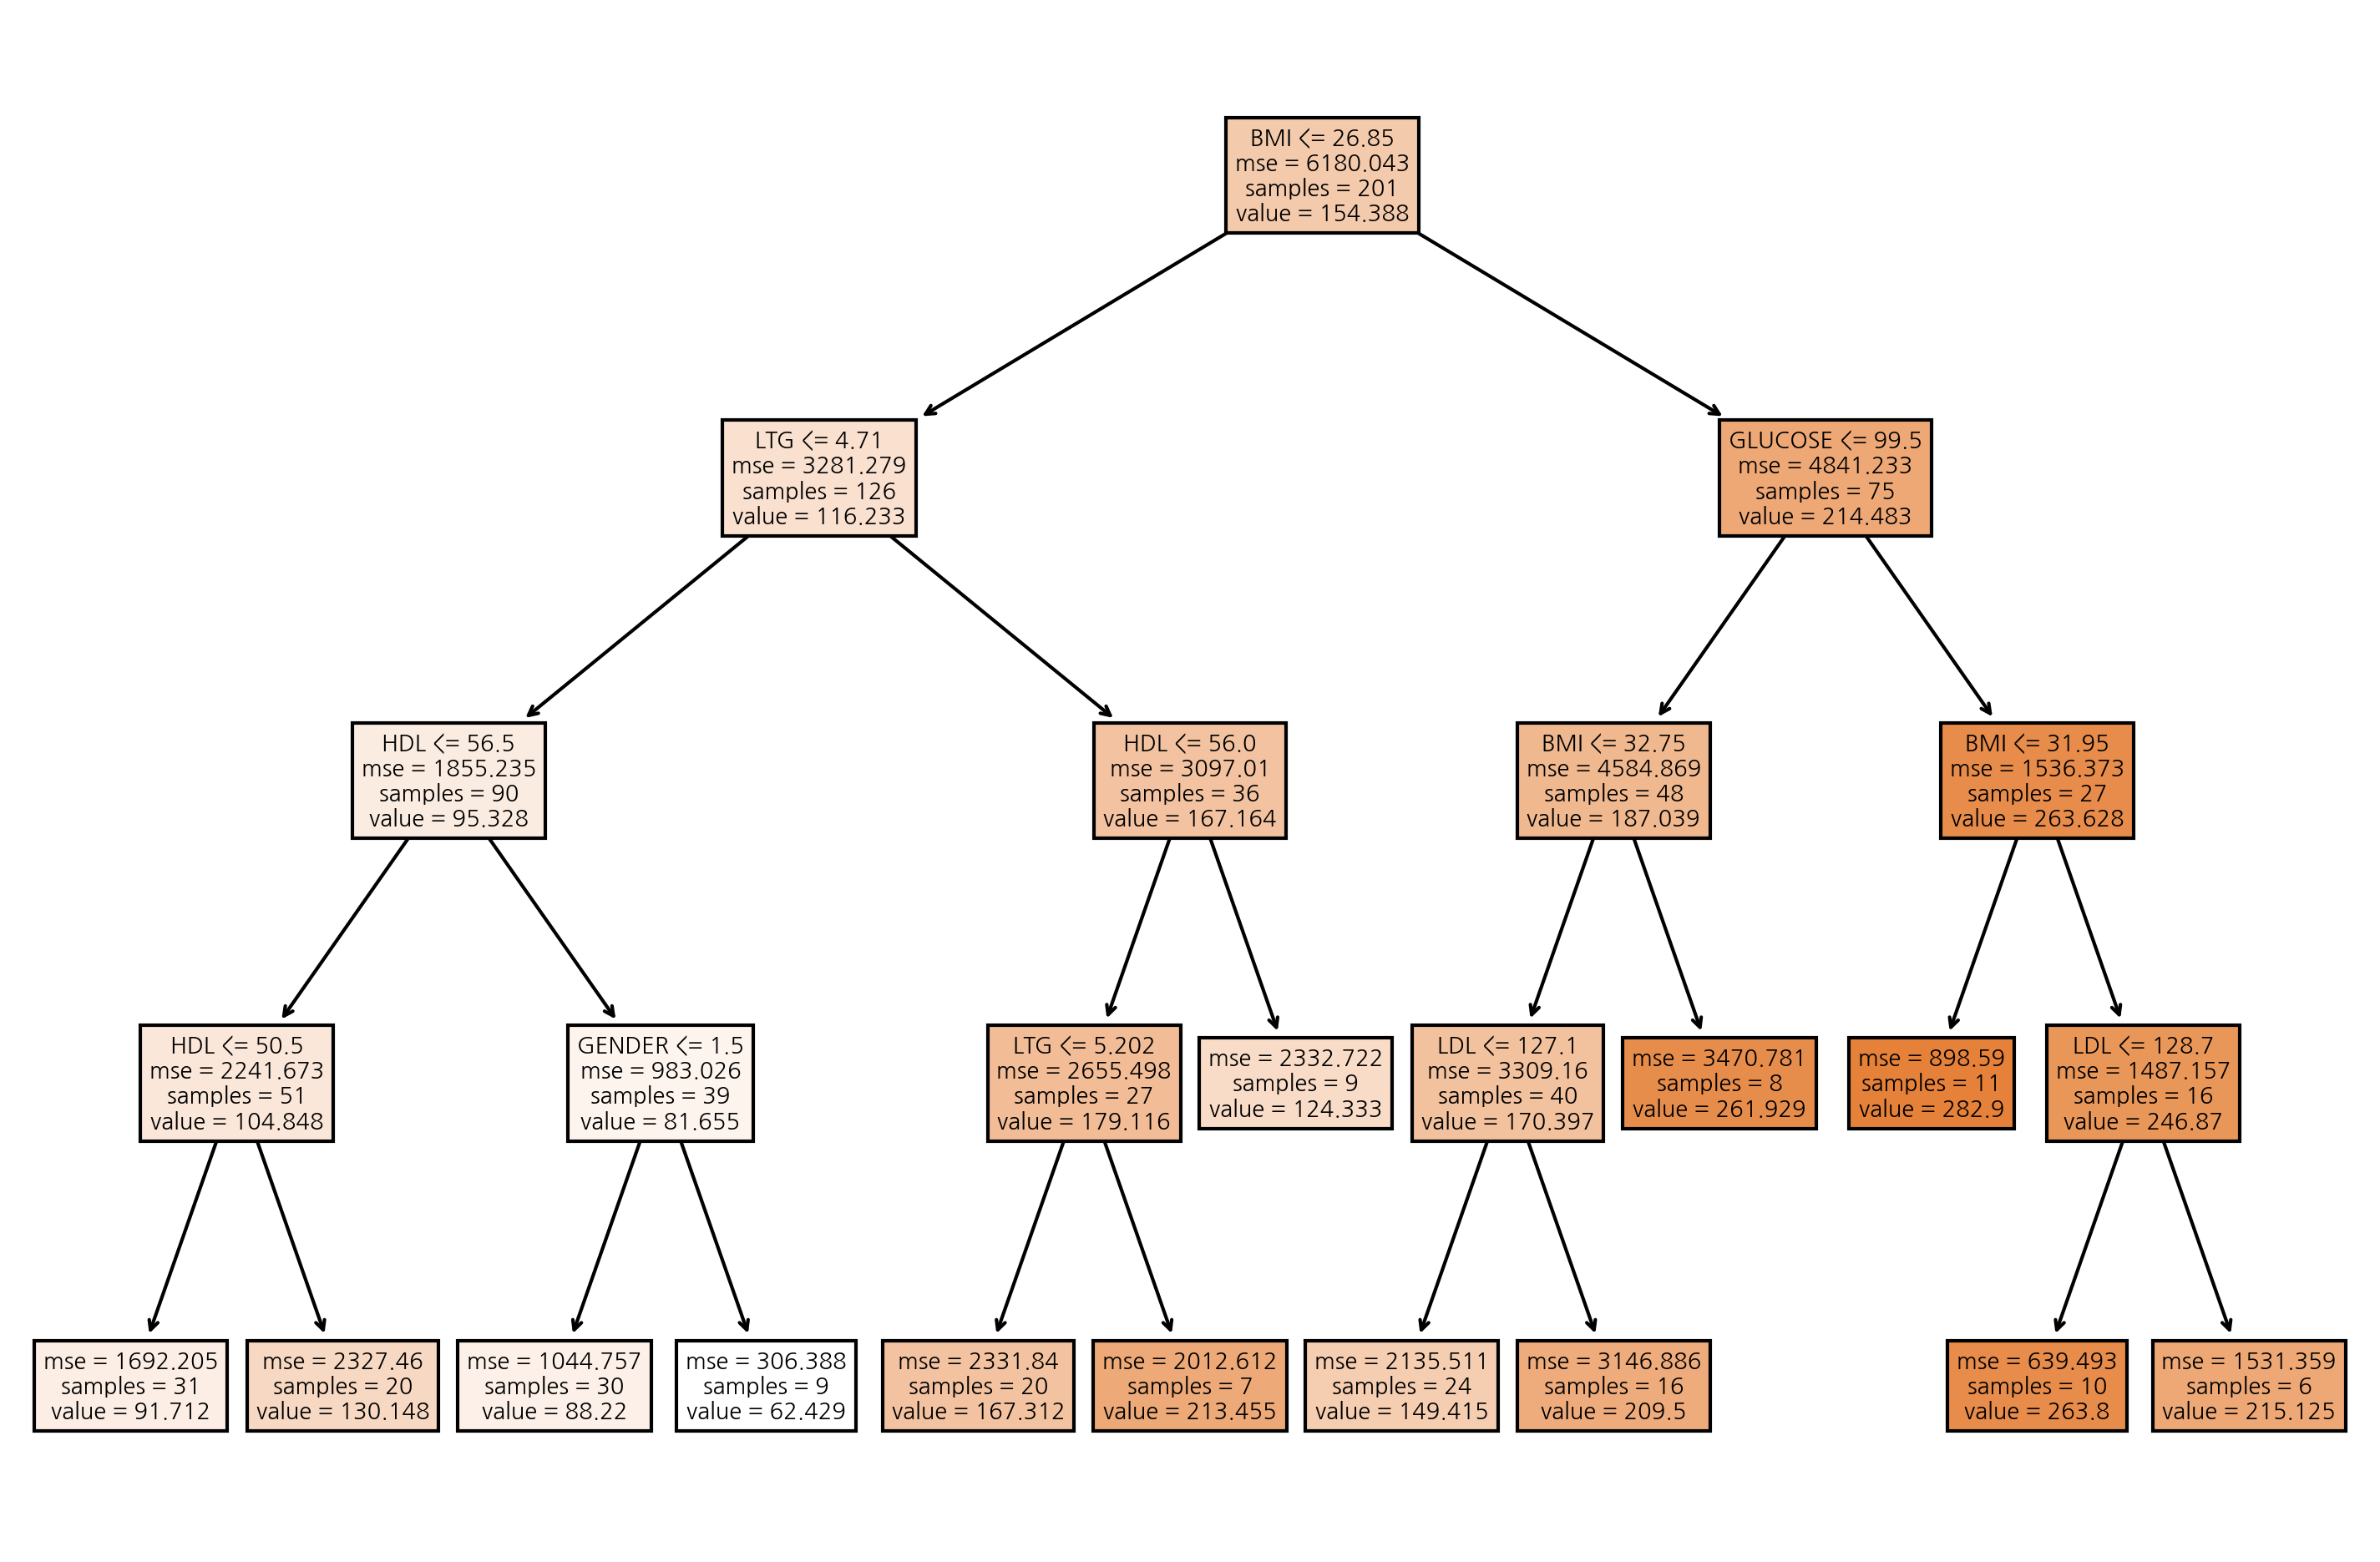

In [192]:
v_feature_name = df_train_x.columns
flg, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,8),dpi=300)
plot_tree(rf_final.estimators_[10], feature_names=v_feature_name, filled=True)

In [193]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.398
8,LTG,0.344
3,BP,0.068
9,GLUCOSE,0.062
6,HDL,0.042
5,LDL,0.027
0,AGE,0.019
7,TCH,0.019
4,CHOLESTEROL,0.016
1,GENDER,0.006


Text(0, 0.5, '변수')

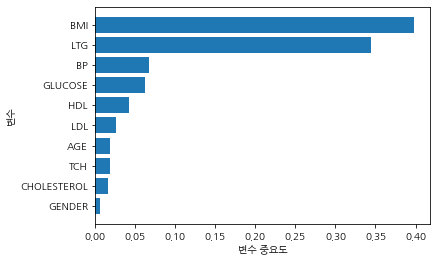

In [194]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [ ]:
estimator = RandomForestRegressor(random_state=1234)
param_grid = {"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
grid_df.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("best parameter: \n{}".format(grid_dt.best_parmas_))
print("best score: \n{}".format(grid_dt.best_score_.round(3)))

## 실습 218p

In [198]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/DIABETES.csv', encoding='euc-kr')

df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis=1, inplace=False)
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [199]:
rf_uncustomized = RandomForestRegressor(random_state=1234)
rf_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(rf_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.919
Score on test set : 0.455


In [200]:
rf_uncustomized

RandomForestRegressor(random_state=1234)

In [201]:
train_score = []
test_score = []

para_n_tree = [n_tree for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    rf = RandomForestRegressor(n_estimators=v_n_estimators, random_state = 1234)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,1,0.589,-0.363
1,2,0.738,-0.055
2,3,0.792,0.101
3,4,0.803,0.195
4,5,0.839,0.281
5,6,0.857,0.335
6,7,0.872,0.363
7,8,0.882,0.367
8,9,0.888,0.370
9,10,0.892,0.393


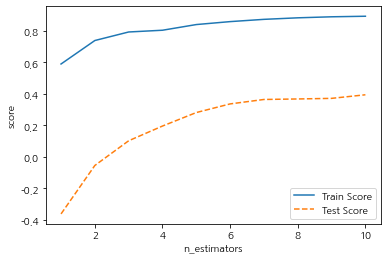

In [202]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [203]:
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    rf = RandomForestRegressor(n_estimators=100, random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.919,0.455
1,2,0.883,0.461
2,3,0.832,0.471
3,4,0.786,0.470
4,5,0.752,0.468
5,6,0.718,0.470
6,7,0.694,0.475
7,8,0.671,0.474
8,9,0.650,0.478
9,10,0.633,0.476


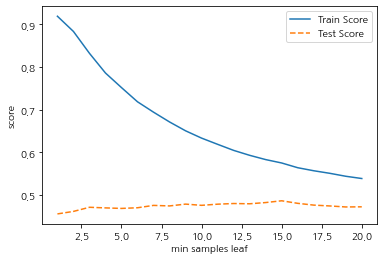

In [204]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [205]:
train_score = []
test_score = []

para_split = [n_split for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    rf = RandomForestRegressor(n_estimators=100, random_state = 1234, min_samples_leaf=6, min_samples_split=v_min_samples_split)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.718,0.470
1,3,0.718,0.470
2,4,0.718,0.470
3,5,0.718,0.470
4,6,0.718,0.470
5,7,0.718,0.470
6,8,0.718,0.470
7,9,0.718,0.470
8,10,0.718,0.470
9,11,0.718,0.470


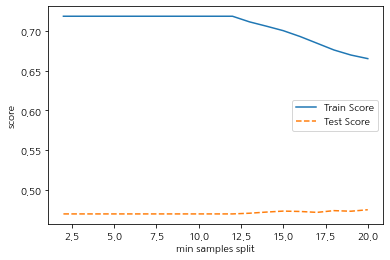

In [206]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [207]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    rf = RandomForestRegressor(n_estimators=100, random_state = 1234, min_samples_leaf=6, min_samples_split=14, max_depth=v_max_depth)
    rf.fit(df_train_x, df_train_y)
    train_score.append(rf.score(df_train_x, df_train_y))
    test_score.append(rf.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["Depth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,Depth,TrainScore,TestScore
0,1,0.387,0.406
1,2,0.491,0.474
2,3,0.568,0.492
3,4,0.630,0.487
4,5,0.674,0.480
5,6,0.696,0.473
6,7,0.704,0.472
7,8,0.706,0.472
8,9,0.706,0.472
9,10,0.706,0.472


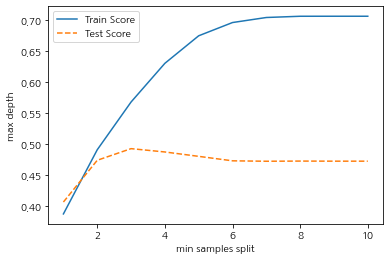

In [208]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("max depth")
plt.xlabel("min samples split")
plt.legend()

In [209]:
rf_final = RandomForestRegressor(random_state=1234, n_estimators=100, min_samples_leaf=6, min_impurity_split=14, max_depth=4)

rf_final.fit(df_train_x, df_train_y)
print("Score on training set : {:.3f}".format(rf_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(rf_final.score(df_test_x, df_test_y)))

Score on training set : 0.634
Score on test set : 0.486


[Text(1395.0, 1630.8, 'BMI <= 26.85\nmse = 6815.251\nsamples = 199\nvalue = 153.314'),
 Text(824.3181818181818, 1268.4, 'TCH <= 5.815\nmse = 3329.935\nsamples = 117\nvalue = 111.979'),
 Text(507.27272727272725, 906.0, 'HDL <= 55.5\nmse = 2396.151\nsamples = 104\nvalue = 101.276'),
 Text(253.63636363636363, 543.6000000000001, 'LTG <= 4.033\nmse = 2722.132\nsamples = 59\nvalue = 115.681'),
 Text(126.81818181818181, 181.20000000000005, 'mse = 1681.562\nsamples = 9\nvalue = 73.75'),
 Text(380.45454545454544, 181.20000000000005, 'mse = 2500.946\nsamples = 50\nvalue = 124.282'),
 Text(760.9090909090909, 543.6000000000001, 'LTG <= 4.533\nmse = 1284.285\nsamples = 45\nvalue = 81.652'),
 Text(634.090909090909, 181.20000000000005, 'mse = 618.6\nsamples = 33\nvalue = 72.0'),
 Text(887.7272727272727, 181.20000000000005, 'mse = 2145.734\nsamples = 12\nvalue = 107.053'),
 Text(1141.3636363636363, 906.0, 'AGE <= 51.5\nmse = 3610.389\nsamples = 13\nvalue = 184.667'),
 Text(1014.5454545454545, 543.6000

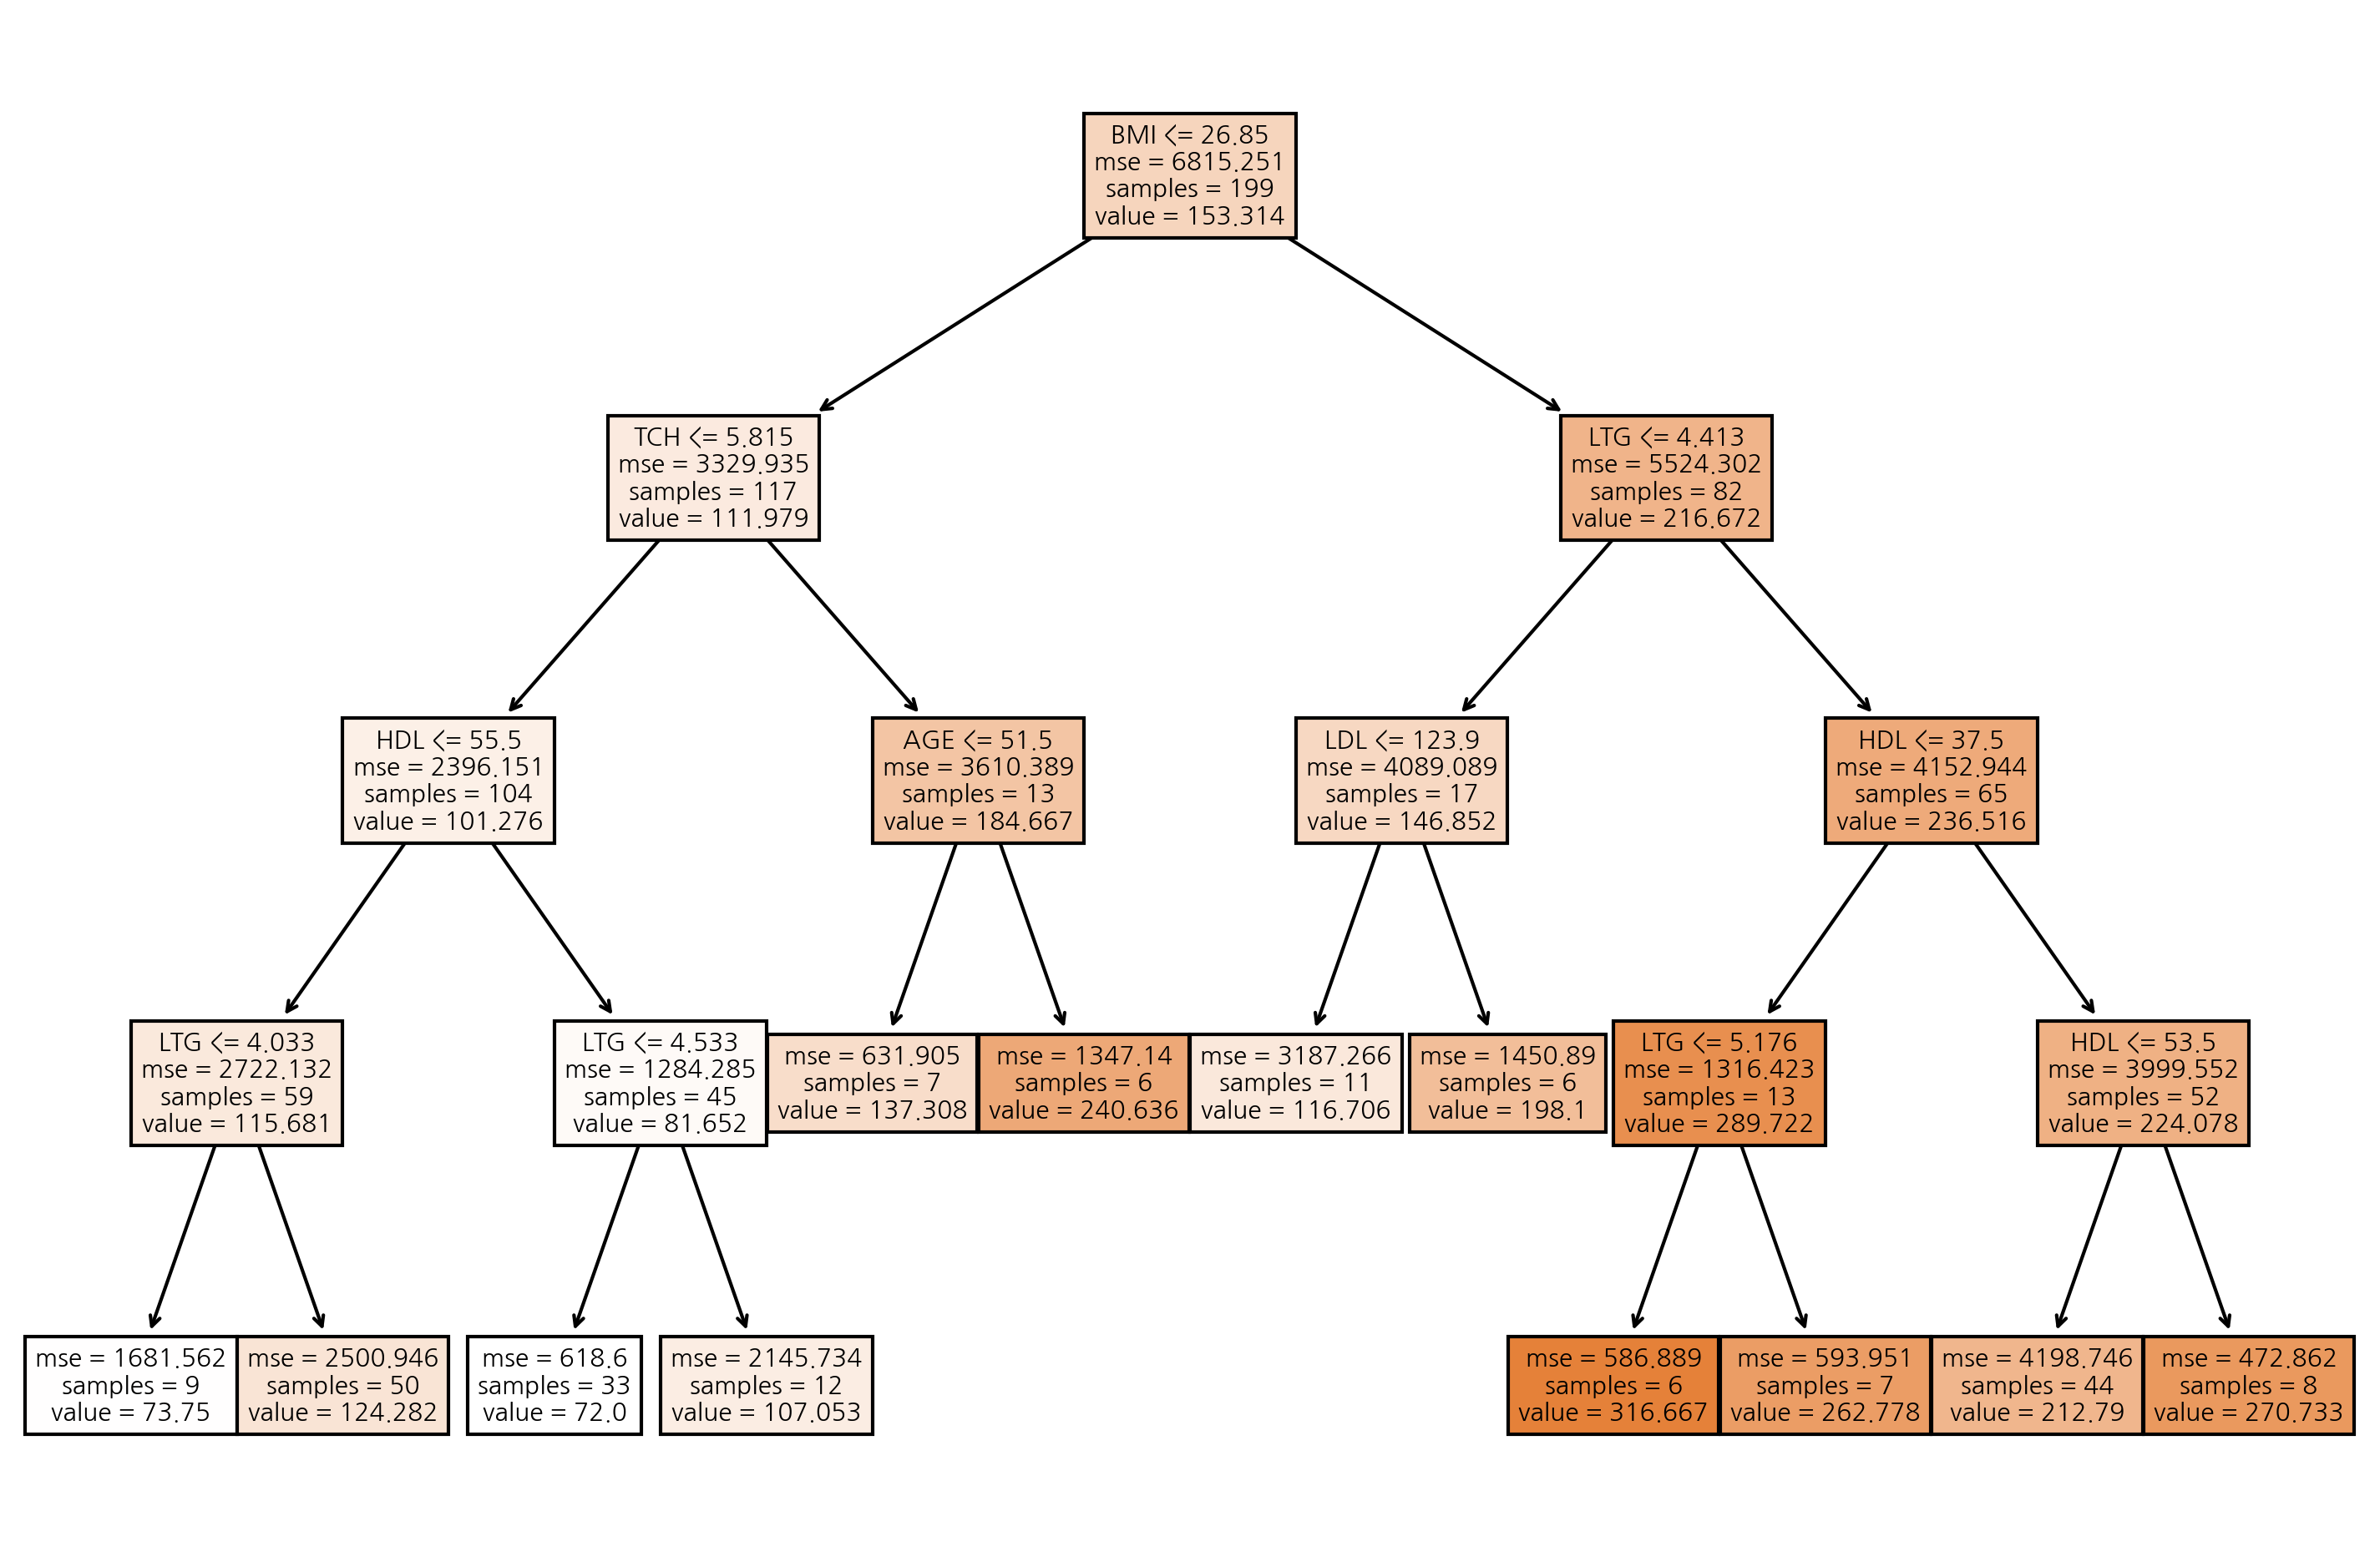

In [210]:
v_feature_name = df_train_x.columns
flg, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,8),dpi=300)
plot_tree(rf_final.estimators_[0], feature_names=v_feature_name, filled=True)

[Text(1576.9565217391305, 1630.8, 'LTG <= 4.824\nmse = 5958.392\nsamples = 198\nvalue = 148.699'),
 Text(909.7826086956521, 1268.4, 'BMI <= 26.85\nmse = 3560.162\nsamples = 132\nvalue = 117.361'),
 Text(485.2173913043478, 906.0, 'HDL <= 55.5\nmse = 2192.611\nsamples = 102\nvalue = 103.303'),
 Text(242.6086956521739, 543.6000000000001, 'LTG <= 4.27\nmse = 2519.638\nsamples = 60\nvalue = 119.717'),
 Text(121.30434782608695, 181.20000000000005, 'mse = 2419.751\nsamples = 18\nvalue = 93.308'),
 Text(363.9130434782609, 181.20000000000005, 'mse = 2175.985\nsamples = 42\nvalue = 130.121'),
 Text(727.8260869565217, 543.6000000000001, 'LTG <= 4.159\nmse = 1012.976\nsamples = 42\nvalue = 82.616'),
 Text(606.5217391304348, 181.20000000000005, 'mse = 339.726\nsamples = 18\nvalue = 67.97'),
 Text(849.1304347826086, 181.20000000000005, 'mse = 1245.41\nsamples = 24\nvalue = 94.7'),
 Text(1334.3478260869565, 906.0, 'GLUCOSE <= 97.5\nmse = 5023.378\nsamples = 30\nvalue = 175.35'),
 Text(1213.0434782608

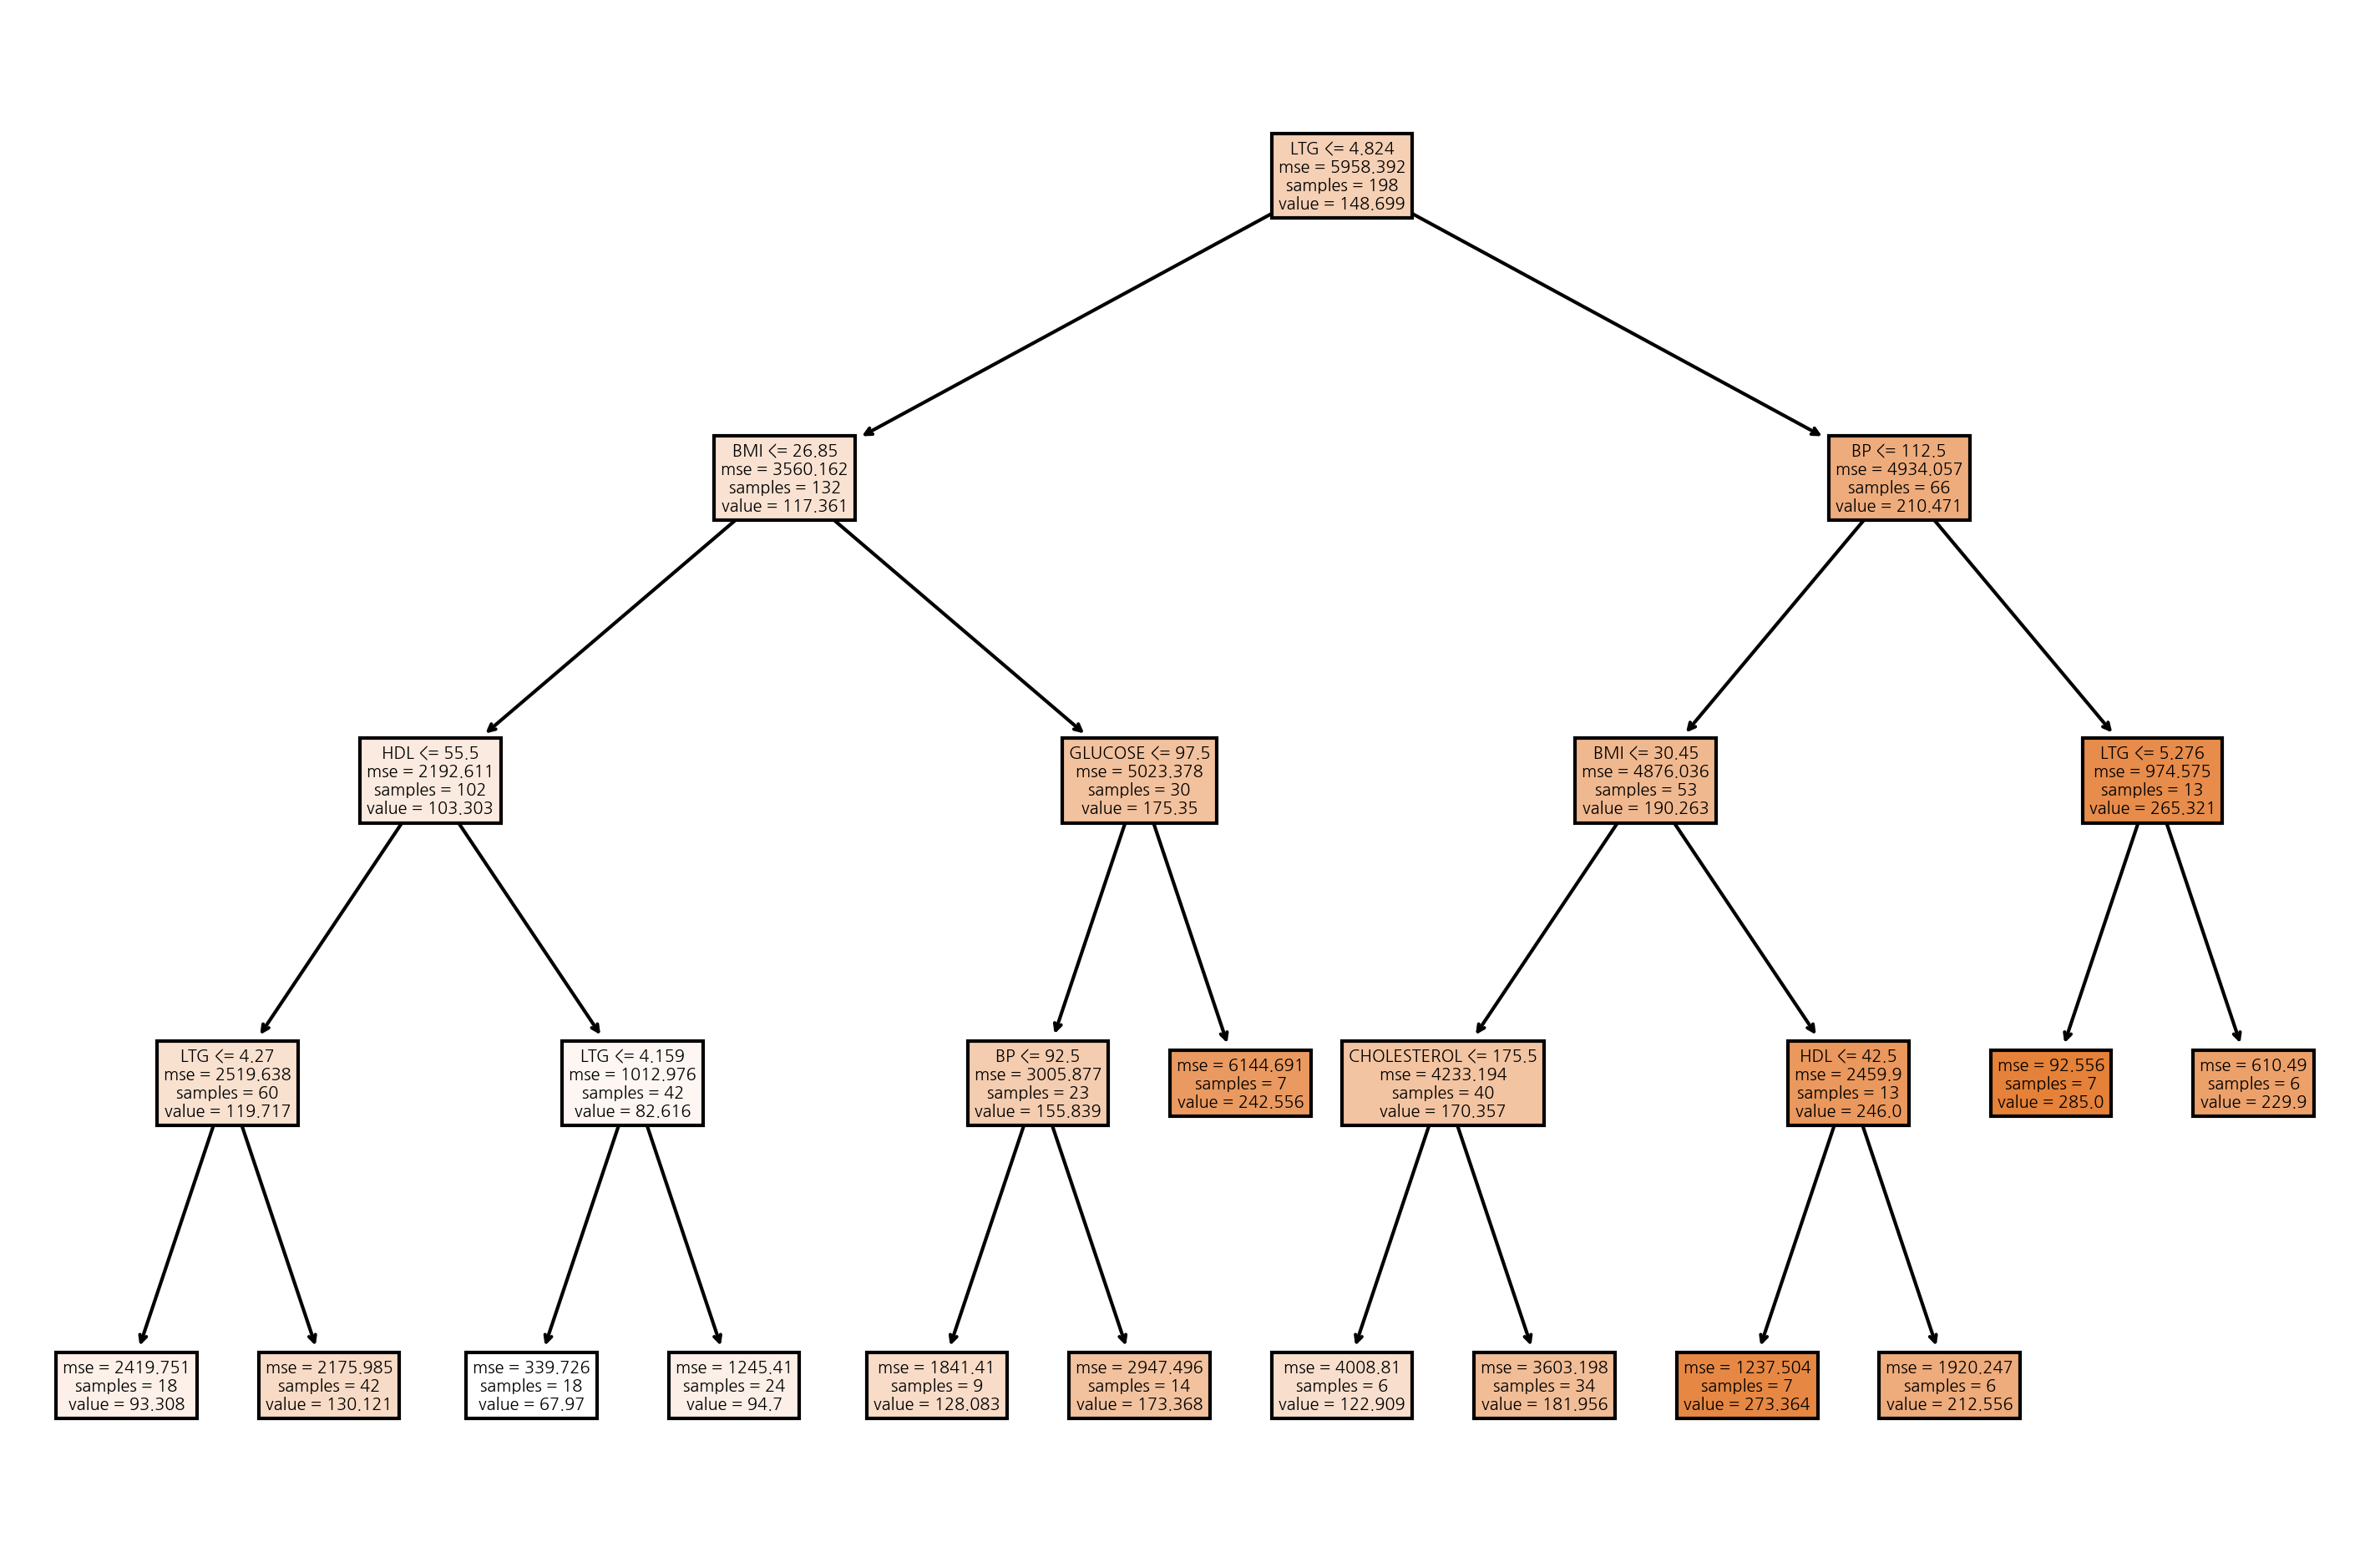

In [211]:
v_feature_name = df_train_x.columns
flg, axes = plt.subplots(nrows=1, ncols=1,figsize=(12,8),dpi=300)
plot_tree(rf_final.estimators_[5], feature_names=v_feature_name, filled=True)

In [212]:
df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = rf_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.398
8,LTG,0.344
3,BP,0.068
9,GLUCOSE,0.062
6,HDL,0.042
5,LDL,0.027
0,AGE,0.019
7,TCH,0.019
4,CHOLESTEROL,0.016
1,GENDER,0.006


Text(0, 0.5, '변수')

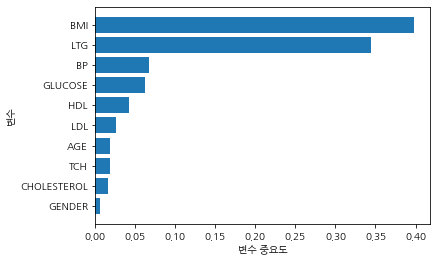

In [213]:
df_importance.sort_values("Importance", ascending=True, inplace=True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [216]:
estimator = RandomForestRegressor(random_state=1234)
param_grid = {"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("best estimator model: \n{}".format(grid_dt.best_params_))
print("best estimator model: \n{}".format(grid_dt.best_score_.round(3)))

best estimator model: 
RandomForestRegressor(max_depth=5, min_samples_leaf=12, random_state=1234)
best estimator model: 
{'max_depth': 5, 'min_samples_leaf': 12, 'min_samples_split': 2}
best estimator model: 
0.416


## 연습 229p

In [217]:
from sklearn.ensemble import GradientBoostingRegressor

In [228]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/체질검사.csv', encoding='euc-kr')

df_raw_y = df_raw["FAT"]
df_raw_x = df_raw.drop("FAT", axis=1, inplace=False)
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


In [231]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.865
Score on test set : 0.451


In [232]:
gb_uncustomized

GradientBoostingRegressor(random_state=1234)

In [235]:
train_score = []
test_score = []

para_n_tree = [n_tree for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,1,0.098,0.084
1,2,0.179,0.164
2,3,0.246,0.228
3,4,0.302,0.277
4,5,0.348,0.312
5,6,0.390,0.341
6,7,0.425,0.373
7,8,0.456,0.391
8,9,0.481,0.406
9,10,0.504,0.430


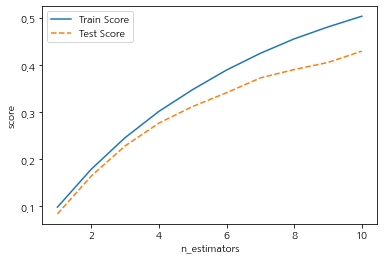

In [236]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()

In [237]:
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.707,0.500
1,2,0.708,0.505
2,3,0.701,0.505
3,4,0.700,0.492
4,5,0.691,0.468
5,6,0.683,0.492
6,7,0.682,0.496
7,8,0.675,0.490
8,9,0.679,0.498
9,10,0.684,0.502


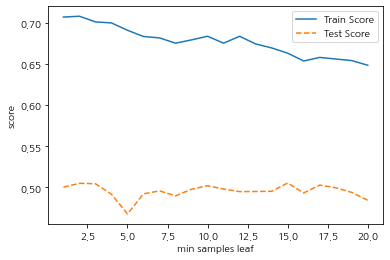

In [238]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [239]:
train_score = []
test_score = []

para_split = [n_split for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=11, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.675,0.498
1,3,0.675,0.498
2,4,0.675,0.498
3,5,0.675,0.498
4,6,0.675,0.498
5,7,0.675,0.498
6,8,0.675,0.498
7,9,0.675,0.498
8,10,0.675,0.498
9,11,0.675,0.498


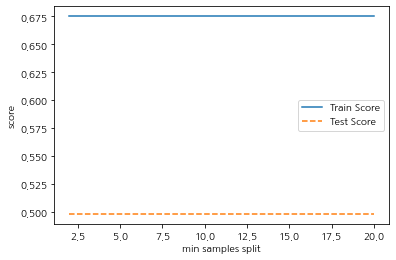

In [240]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [241]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = RandomForestRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=11, min_samples_split=22, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["Depth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,Depth,TrainScore,TestScore
0,1,0.388,0.395
1,2,0.492,0.472
2,3,0.555,0.480
3,4,0.591,0.463
4,5,0.609,0.456
5,6,0.616,0.454
6,7,0.617,0.454
7,8,0.617,0.454
8,9,0.617,0.454
9,10,0.617,0.454


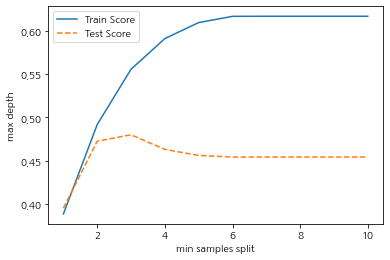

In [242]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("max depth")
plt.xlabel("min samples split")
plt.legend()

In [244]:
train_score = []
test_score = []

para_lr= [lr for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=11,\
                                   min_samples_split=22, max_depth=4, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["LearningRate"] = para_lr
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,LearningRate,TrainScore,TestScore
0,1,9.830000e-01,1.270000e-01
1,2,0.000000e+00,-1.109000e+00
2,3,-6.335092e+17,-7.400637e+17
3,4,-2.333508e+28,-2.702228e+28
4,5,-7.310052e+35,-8.466798e+35
5,6,-4.767328e+41,-5.522367e+41
6,7,-2.697454e+46,-3.125195e+46
7,8,-2.803468e+50,-3.248103e+50
8,9,-8.455963e+53,-9.797283e+53


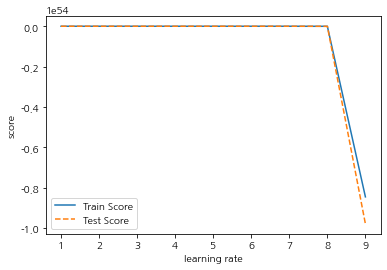

In [245]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()

In [246]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11,\
                                     min_impurity_split=22, max_depth=4, learning_rate=0.1)

gb_final.fit(df_train_x, df_train_y)
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.757
Score on test set : 0.475


In [248]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.398
8,LTG,0.240
9,GLUCOSE,0.082
3,BP,0.066
5,LDL,0.049
6,HDL,0.045
4,CHOLESTEROL,0.041
7,TCH,0.027
0,AGE,0.027
1,GENDER,0.025


Text(0, 0.5, '변수')

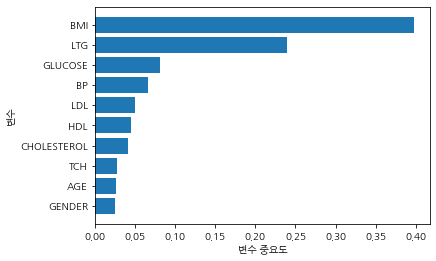

In [250]:
df_importance.sort_values("Importance", ascending=True,inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")

In [ ]:
estimator = RandomForestRegressor(random_state=1234)
param_grid = {"max_depth":para_depth, "min_samples_split":para_split, "min_samples_leaf":para_leaf}
grid_dt = GridSearchCV(estimator, param_grid, scoring="r2", n_jobs=-1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model: \n{}".format(grid_dt.best_estimator_))
print("best estimator model: \n{}".format(grid_dt.best_params_))
print("best estimator model: \n{}".format(grid_dt.best_score_.round(3)))

## 실습 246p

In [253]:
df_raw = pd.read_csv('/home/piai/Dayonizzang._.r/BigData 실습/Big Data 분석/DIABETES.csv', encoding='euc-kr')

df_raw_y = df_raw["Y"]
df_raw_x = df_raw.drop("Y", axis=1, inplace=False)
df_raw.head()

,Y,AGE,GENDER,BMI,BP,CHOLESTEROL,LDL,HDL,TCH,LTG,GLUCOSE
0,151,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87
1,75,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69
2,141,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85
3,206,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89
4,135,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80


In [254]:
gb_uncustomized = GradientBoostingRegressor(random_state=1234)
gb_uncustomized.fit(df_train_x, df_train_y)

print("Score on training set : {:.3f}".format(gb_uncustomized.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_uncustomized.score(df_test_x, df_test_y)))

Score on training set : 0.865
Score on test set : 0.451


In [255]:
gb_uncustomized

GradientBoostingRegressor(random_state=1234)

In [256]:
train_score = []
test_score = []

para_n_tree = [n_tree for n_tree in range(1, 11)]

for v_n_estimators in para_n_tree:
    gb = GradientBoostingRegressor(n_estimators=v_n_estimators, random_state = 1234)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_n = pd.DataFrame()
df_score_n["n_estimators"] = para_n_tree
df_score_n["TrainScore"] = train_score
df_score_n["TestScore"] = test_score
df_score_n.round(3)

,n_estimators,TrainScore,TestScore
0,1,0.098,0.084
1,2,0.179,0.164
2,3,0.246,0.228
3,4,0.302,0.277
4,5,0.348,0.312
5,6,0.390,0.341
6,7,0.425,0.373
7,8,0.456,0.391
8,9,0.481,0.406
9,10,0.504,0.430


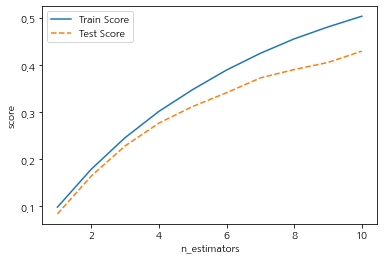

In [257]:
plt.plot(para_n_tree, train_score, linestyle="-", label="Train Score")
plt.plot(para_n_tree, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("n_estimators")
plt.legend()


In [258]:
train_score = []
test_score = []

para_leaf = [n_leaf for n_leaf in range(1, 21)]

for v_min_samples_leaf in para_leaf:
    gb = GradientBoostingRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=v_min_samples_leaf)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesLeaf"] = para_leaf
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesLeaf,TrainScore,TestScore
0,1,0.707,0.500
1,2,0.708,0.505
2,3,0.701,0.505
3,4,0.700,0.492
4,5,0.691,0.468
5,6,0.683,0.492
6,7,0.682,0.496
7,8,0.675,0.490
8,9,0.679,0.498
9,10,0.684,0.502


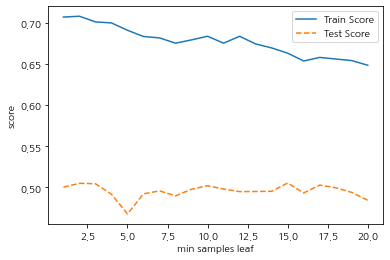

In [259]:
plt.plot(para_leaf, train_score, linestyle="-", label="Train Score")
plt.plot(para_leaf, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples leaf")
plt.legend()

In [260]:
train_score = []
test_score = []

para_split = [n_split for n_split in range(2, 21)]

for v_min_samples_split in para_split:
    gb = GradientBoostingRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=11, min_samples_split=v_min_samples_split)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["MinSamplesSplit"] = para_split
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,MinSamplesSplit,TrainScore,TestScore
0,2,0.675,0.498
1,3,0.675,0.498
2,4,0.675,0.498
3,5,0.675,0.498
4,6,0.675,0.498
5,7,0.675,0.498
6,8,0.675,0.498
7,9,0.675,0.498
8,10,0.675,0.498
9,11,0.675,0.498


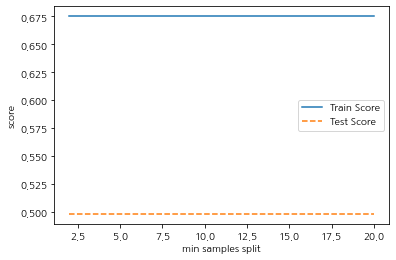

In [261]:
plt.plot(para_split, train_score, linestyle="-", label="Train Score")
plt.plot(para_split, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("min samples split")
plt.legend()

In [262]:
train_score = []
test_score = []

para_depth = [depth for depth in range(1, 11)]

for v_max_depth in para_depth:
    gb = RandomForestRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=11, min_samples_split=22, max_depth=v_max_depth)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["Depth"] = para_depth
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,Depth,TrainScore,TestScore
0,1,0.388,0.395
1,2,0.492,0.472
2,3,0.555,0.480
3,4,0.591,0.463
4,5,0.609,0.456
5,6,0.616,0.454
6,7,0.617,0.454
7,8,0.617,0.454
8,9,0.617,0.454
9,10,0.617,0.454


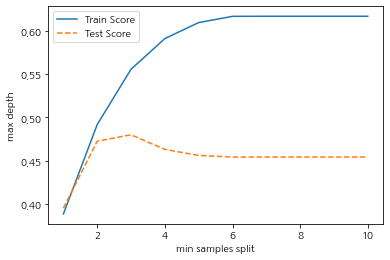

In [263]:
plt.plot(para_depth, train_score, linestyle="-", label="Train Score")
plt.plot(para_depth, test_score, linestyle="--", label="Test Score")
plt.ylabel("max depth")
plt.xlabel("min samples split")
plt.legend()

In [264]:
train_score = []
test_score = []

para_lr= [lr for lr in range(1, 10)]

for v_learning_rate in para_lr:
    gb = GradientBoostingRegressor(n_estimators=30, random_state = 1234, min_samples_leaf=11,\
                                   min_samples_split=22, max_depth=4, learning_rate=v_learning_rate)
    gb.fit(df_train_x, df_train_y)
    train_score.append(gb.score(df_train_x, df_train_y))
    test_score.append(gb.score(df_test_x, df_test_y))
    
df_score_leaf = pd.DataFrame()
df_score_leaf["LearningRate"] = para_lr
df_score_leaf["TrainScore"] = train_score
df_score_leaf["TestScore"] = test_score
df_score_leaf.round(3)

,LearningRate,TrainScore,TestScore
0,1,9.830000e-01,1.270000e-01
1,2,0.000000e+00,-1.109000e+00
2,3,-6.335092e+17,-7.400637e+17
3,4,-2.333508e+28,-2.702228e+28
4,5,-7.310052e+35,-8.466798e+35
5,6,-4.767328e+41,-5.522367e+41
6,7,-2.697454e+46,-3.125195e+46
7,8,-2.803468e+50,-3.248103e+50
8,9,-8.455963e+53,-9.797283e+53


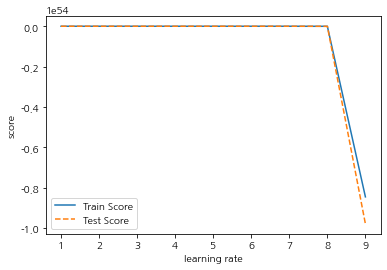

In [265]:
plt.plot(para_lr, train_score, linestyle="-", label="Train Score")
plt.plot(para_lr, test_score, linestyle="--", label="Test Score")
plt.ylabel("score")
plt.xlabel("learning rate")
plt.legend()


In [266]:
gb_final = GradientBoostingRegressor(random_state=1234, n_estimators=30, min_samples_leaf=11,\
                                     min_impurity_split=22, max_depth=4, learning_rate=0.1)

gb_final.fit(df_train_x, df_train_y)
print("Score on training set : {:.3f}".format(gb_final.score(df_train_x, df_train_y)))
print("Score on test set : {:.3f}".format(gb_final.score(df_test_x, df_test_y)))

Score on training set : 0.757
Score on test set : 0.475


In [267]:
v_feature_name = df_train_x.columns

df_importance = pd.DataFrame()
df_importance["Feature"] = v_feature_name
df_importance["Importance"] = gb_final.feature_importances_

df_importance.sort_values("Importance", ascending=False, inplace = True)
df_importance.round(3)

,Feature,Importance
2,BMI,0.398
8,LTG,0.240
9,GLUCOSE,0.082
3,BP,0.066
5,LDL,0.049
6,HDL,0.045
4,CHOLESTEROL,0.041
7,TCH,0.027
0,AGE,0.027
1,GENDER,0.025


Text(0, 0.5, '변수')

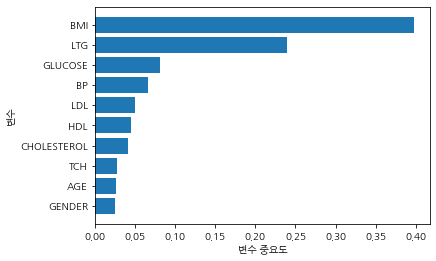

In [268]:
df_importance.sort_values("Importance", ascending=True,inplace=True)
coordinates = range(len(df_importance))

plt.barh(y=coordinates, width=df_importance["Importance"])
plt.yticks(coordinates, df_importance["Feature"])
plt.xlabel("변수 중요도")
plt.ylabel("변수")